# Delivered

Description of incremental development/changes throughout the project.

## Cycle 1

1. Business Planning
     - Business problem
     - Input
     - Output
     - Process
     - Desk research
     
2. Feature Engineering
     - Recency
     - Frequency
     - Monetization
    
3. Clustering Validation Metrics
     - WSS (Within-Cluster Sum of Square)
     - SS (Silhouette Score)
       
4. Cluster Analysis
     - 3D plot
     - Cluster Profile
     
     

## Cycle 2

1. Feature Engineering
     - Average Ticket
    
2. Silhouette Analysis
     - Silhouette Analysis
     
3. Cluster Visualization
     - UMAP
     
4. Cluster Profile Analysis
     - Description of cluster centroids

## Cycle 3

1. Descriptive Analysis
     - Numerical attributes
     - Categorical attributes
    
2. Feature Engineering
     - Average Recency
     - Number of Returns
     
3. Data preparation
     - Standard Scaler
     
4. Cluster Analisys
    - Umap
    - New cluster profile

## Cycle 4

1. Descriptive Analysis
    - Fix NA
    - Descriptive Statistics
2. Variable Filtering
    - 5 variables filtered 
3. Feature Engeneering
    - Create new features 
4. EDA
    - Univariate
    - Bibariate
5. Space Study
    - PCA
    - UMAP
    - t-SNE
    - Tree-Based Embedding  
6. EDA
    - Data Space: Tree-Based Embedding
7. Data Preparation
    - MinMaxScaler

## Cycle 5

1. Hyperparameter Fine-Tuning
    - K-Means, GMM, HC, DBScan
2. Generic Silhouette Analysis

## Cycle 6

1. Data Preparation
2. Feature Selection
3. Model Training
4. Cluster Analysis
5. Tree-Based Embedding

## Cycle 7

1. Cluster profile

# Solution Planning

## Business Problem

**What is the business problem?**
1. Select the most valuable customers to join the "Loyals" loyalty program.

2. Answering business questions to the marketing team.

### Output

**What will I deliver? / Where does the business team want to see it?**

* 1) List in xls / send by email. It must contain customers who will join Loyals (loyalty program).
    - Format:
   
| client_id | is_loyal |
|-----------|----------|
|1          |yes       |
|2          |no        |

* 2) PDF report answering business questions / send by email and present to the marketing team:
     - Who are the people eligible to participate in the Loyals program?
     - How many customers will be part of the group?
     - What are the main characteristics of these customers?
     - What is the percentage of revenue contribution from Loyals?
     - What is the expected revenue for this group for the coming months?
     - What are the conditions for a person to be eligible for Loyals?
     - What are the conditions for a person to be removed from Loyals?
     - What is the guarantee that the Loyals program is better than the rest of the base?
     - What actions can the marketing team take to increase revenue?

### Input

**Data sources:**
     Dataset "Ecommerce.csv", containing e-commerce sales for the period of one year.

**Tools:**
     Python 3.8.12, Jupyter Notebook, Git, Github.

### Process

**Type of problem:**
Separation of customers by groups.
    
**Main methods:**
    clustering.

**Business Questions:**
* 1) Who are the people eligible to participate in the Loyals program?
    - What does it mean to be eligible? / What are higher "value" customers? (depending on business area)
        - Invoicing:
             - High average ticket
             - High LTV (sum of customer revenue)
             - Low recency (time since last purchase)
             - High basket size (qty products purchased per purchase)
             - Low churn probability (would use the output of a model)
             - High LTV Prediction (would use output from a model)
             - High propensity to buy (would use the output of a model)
        - Cost:
             - Low return rate
        - Shopping experience:
             - High average of the evaluations

 PS: the features will be created in feature engineering.
 
 
* 2) How many customers will be part of the group?
    - Number of customers
    - % in relation to the total number of clients
    
    
* 3) What are the main characteristics of these customers?
    - Write customer characteristics:
        - Age
        - Country
        - Wage
        - Location
     - Write key customer buying behaviors (business metrics)
        - See clustering features (question 1)
         
 For look alike: prospecting similar customers on the internet


* 4) What percentage of revenue contribution comes from Loyals?
    - Calculate the company's total revenue during the year.
    - Calculate the revenue (%) for the Loyals cluster only.
   
   
* 5) What is the expected revenue for this group for the coming months?
    - Loyals LTV calculation (with moving average, time series, arima..)
    - Time Series (ARMA, ARIMA, HoltWinter, etc.)
    - Cohort analysis (with time, location, product..)

 There must be a billing target, consult business.
    
    
* 6) What are the conditions for a person to be eligible for Loyals?
    - Set the evaluation interval (every 1 month, 3 months..)
    - The client's "performance" should be close to the Loyals cluster average.
    
    
* 7) What are the conditions for a person to be removed from Loyals?
    - Customer "performance" is no longer closer to the Loyals cluster average.
   
   
* 8) What is the guarantee that the Loyals program is better than the rest of the base?
    - A/B test
    - Hypothesis test


* 9) What actions can the marketing team take to increase revenue?
    - Discount
    - Purchase preference
    - Cheaper shipping
    - Visit the company
    - Offer personal stylist
    - Recommend cross selling
    - Offer exclusive content

## Solution Benchmarking

### Desk Research

Reading articles on customer segmentation on the internet to understand what the market is doing.

Identify from market solutions, with the business team, what we can do as an MVP.

1. RFM segmentation model.

# Environment Preparation

## Imports

In [2]:
import pandas            as pd
import seaborn           as sns
import datetime          as dt
import umap.umap_        as umap
import numpy             as np
import re

from matplotlib               import cm as cm
from matplotlib               import pyplot as plt
from tabulate                 import tabulate
from IPython.core.display     import HTML
from yellowbrick.cluster      import KElbowVisualizer, SilhouetteVisualizer
from plotly                   import express as px
from pandas_profiling         import ProfileReport

from sklearn                  import preprocessing as pp
from sklearn                  import cluster as c
from sklearn                  import metrics as m
from sklearn                  import decomposition as dd
from sklearn                  import manifold as mn
from sklearn                  import ensemble as en
from sklearn                  import mixture as mx
from sklearn.neighbors        import NearestNeighbors

from scipy.cluster            import hierarchy as hc

## Helper Functions

In [3]:
def jupyter_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)
    sns.set()
jupyter_settings()

# Data Collection

In [4]:
#read data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='unicode_escape')

In [6]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [7]:
df_raw = df_raw.drop('Unnamed: 8', axis=1).copy()
df_raw.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16361,537653,22107,PIZZA PLATE IN BOX,1,5-Dec-16,3.75,17897.0,United Kingdom
343519,566952,72816,SET/3 CHRISTMAS DECOUPAGE CANDLES,1,13-Sep-17,2.46,NaN,United Kingdom
533269,581021,22138,BAKING SET 9 PIECE RETROSPOT,3,5-Dec-17,4.95,14769.0,United Kingdom


# Data Description

In [8]:
df1 = df_raw.copy()

## Rename Columns

In [9]:
df1.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
444332,574726,22620,4 TRADITIONAL SPINNING TOPS,1,4-Nov-17,1.45,14664.0,United Kingdom
226677,556812,20902,VINTAGE KEEPSAKE BOX PARIS DAYS,3,12-Jun-17,4.13,NaN,United Kingdom
281084,561513,22318,FIVE HEART HANGING DECORATION,3,25-Jul-17,5.79,NaN,United Kingdom


In [10]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df1.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']

## Feature Description 

In [12]:
# Explain feature meanings
tab_meanings = [['Columns', 'Meaning'],
        ['invoice_no', 'unique identifier of each transaction'],
        ['stock_code', 'item code'],
        ['description', 'item name'],
        ['quantity', 'quantity of each item purchased per transaction'],
        ['invoice_date', 'the day the transaction took place'],
        ['unit_price', 'product price per unit'],
        ['customer_id', 'unique customer identifier'],
        ['country', 'customer\'s country of residence']
      ]
print(tabulate(tab_meanings, headers='firstrow', stralign='left', tablefmt='simple'))

Columns       Meaning
------------  -----------------------------------------------
invoice_no    unique identifier of each transaction
stock_code    item code
description   item name
quantity      quantity of each item purchased per transaction
invoice_date  the day the transaction took place
unit_price    product price per unit
customer_id   unique customer identifier
country       customer's country of residence


In [13]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
4885,C536817,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-1,30-Nov-16,3.25,14156.0,EIRE
475610,576906,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,6,15-Nov-17,2.95,18225.0,United Kingdom
335947,566296,23388,WOODLAND MINI BACKPACK,1,9-Sep-17,4.15,17841.0,United Kingdom


## Data Dimensions

In [14]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Check NA

In [16]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [17]:
#let's try to fill NaN of customer_id when there is invoice_no on df_missing, and not on df_not_missing (if applicable)
df_missing = df1.loc[df1['customer_id'].isna()]
df_not_missing = df1.loc[~df1['customer_id'].isna()]
df_missing.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,29-Nov-16,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,29-Nov-16,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,29-Nov-16,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,29-Nov-16,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,29-Nov-16,1.66,NaN,United Kingdom


In [18]:
missing_invoice = df_missing['invoice_no'].drop_duplicates().tolist()
missing_invoice[1:10]

['536544',
 '536545',
 '536546',
 '536547',
 '536549',
 '536550',
 '536552',
 '536553',
 '536554']

In [19]:
#no customer identified 
df_not_missing.loc[df_not_missing['invoice_no'].isin(missing_invoice) == True]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


In [20]:
#another possibility, is to create and set customer_id to this customers with customer_id = NaN
#in a company, we would try to get these ids, from customer table or other sources, because we would need to interact with this customers.
#since we don't have this option here, and we have about 25% of customers without id, it's interesting not to lose them, because it represents 1/4 of the customer's behavior.
#but even if we could not get this customers_id, we could still create the ids based on invoice_no (identifying the created ones) and use this data to cluster the customers (we don't use customer_id as feature). In the end, we would remove the created ones to pass the customer list to marketing team.  

In [21]:
#create reference
df_invoice = pd.DataFrame(df_missing['invoice_no'].drop_duplicates() )
df_invoice.head() #3710 rows

,invoice_no
622,536414
1443,536544
1970,536545
1971,536546
1972,536547


In [22]:
#new ids to be created
np.arange(19000,19000+len(df_invoice),1)

array([19000, 19001, 19002, ..., 22707, 22708, 22709])

In [23]:
df_invoice['customer_id'] = np.arange(19000,19000+len(df_invoice),1)
df_invoice

,invoice_no,customer_id
622,536414,19000
1443,536544,19001
1970,536545,19002
1971,536546,19003
1972,536547,19004
...,...,...
539162,581435,22705
539207,581439,22706
540451,581492,22707
541264,581497,22708


In [24]:
df1.sample(2)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
321261,565141,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,2,30-Aug-17,0.42,17841.0,United Kingdom
42828,540023,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,2,2-Jan-17,3.75,15039.0,United Kingdom


In [25]:
#bind with original dataset
df1 = pd.merge(df1, df_invoice, on='invoice_no', how='left')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [26]:
#coalesce equivalent
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])
df1.sample(5) #customer_id with original and created ids now

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y,customer_id
302120,563376,22815,CARD PSYCHEDELIC APPLES,12,14-Aug-17,0.42,15752.0,United Kingdom,NaN,15752.0
457311,575739,22116,METAL SIGN HIS DINNER IS SERVED,1,9-Nov-17,1.63,NaN,United Kingdom,22351.0,22351.0
516140,579870,23084,RABBIT NIGHT LIGHT,24,28-Nov-17,1.79,12437.0,France,NaN,12437.0
81572,543164,22297,HEART IVORY TRELLIS SMALL,6,1-Feb-17,1.25,13208.0,United Kingdom,NaN,13208.0
77147,542711,21485,RETROSPOT HEART HOT WATER BOTTLE,1,29-Jan-17,4.95,17894.0,United Kingdom,NaN,17894.0


In [27]:
#drop extra columns
df1 = df1.drop(columns = ['customer_id_x','customer_id_y'], axis=1 )

In [28]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [29]:
#check NA
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [30]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

## Change Types

In [31]:
#correct data types ensure correct calculations using the columns on next sessions

In [32]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

In [33]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
242292,558330,85184C,SET 4 VALENTINE DECOUPAGE HEART BOX,1,26-Jun-17,2.95,United Kingdom,12748.0
231304,557262,22699,ROSES REGENCY TEACUP AND SAUCER,3,17-Jun-17,2.95,United Kingdom,16923.0
303816,563555,22086,PAPER CHAIN KIT 50'S CHRISTMAS,2,15-Aug-17,2.95,United Kingdom,16755.0


In [34]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

In [35]:
#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

In [36]:
# invoice_no
#df1['invoice_no'] = df1['invoice_no'].astype(int)
#there are letters on invoice, so let it like object(string). Ex: 'C536379', 'C554197'

In [37]:
# stock_code
#df1['stock_code'] = df1['stock_code'].astype(int)
#there are letters on stock_code, so let it like object(string). Ex: '85123A', '84406B'

In [38]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
474914,576857,22386,JUMBO BAG PINK POLKADOT,1,2017-11-14,2.08,United Kingdom,12748
36393,539451,84030E,ENGLISH ROSE HOT WATER BOTTLE,1,2016-12-15,8.47,United Kingdom,19244
443759,574710,22116,METAL SIGN HIS DINNER IS SERVED,3,2017-11-04,0.79,United Kingdom,15427


In [39]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## Descriptive Statistics

In [40]:
#here we identify state of variables, but take action just on proper sections ahead.
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [41]:
num_attributes.head()

,quantity,unit_price,customer_id
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850


In [42]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### quantity

In [43]:
#1. quantity has negative numbers
    # ACTION: separate our dataset into sales and devolutions [variable filtering]

#### unit_price

In [44]:
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]

### Cathegorical Attributes

In [45]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### invoice_no

In [46]:
cat_attributes.dtypes

invoice_no     object
stock_code     object
description    object
country        object
dtype: object

In [47]:
# problem: we have invoice_no with letters and numbers
#cat_attributes['invoice_no'].astype( int )  # -> error: ex.'C536379'

In [48]:
# identify number of sales with characters on invoice_no: 
df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,United Kingdom,14397
541541,C581499,M,Manual,-1,2017-12-07,224.69,United Kingdom,15498
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,United Kingdom,15311
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,United Kingdom,17315


In [49]:
#looks like all invoice_no with C, has negative quantity. Lets check:
print( f'Total number of invoices: {len( df_letter_invoices )}')
print( f'Total number of negative quantity: {len( df_letter_invoices[ df_letter_invoices["quantity"] < 0 ] )}') 
#3 of difference, let's ignore them

Total number of invoices: 9291
Total number of negative quantity: 9288


In [50]:
#1. since "quantity" variable will be separate into 2 purchase and return datasets, the "invoice_no" with letters will automatically be separated at the return dataset. 
    #ACTION: No action.

#### stock_code

In [51]:
df1['stock_code']

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: stock_code, Length: 541909, dtype: object

In [52]:
# get stock_codes with only letters
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()
#now we have new stock_codes!

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [53]:
#find samples:
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ) ].sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
431869,573768,POST,POSTAGE,3,2017-10-30,40.00,Italy,12552
246097,558680,DOT,DOTCOM POSTAGE,1,2017-06-29,64.88,United Kingdom,21091
231083,557232,POST,POSTAGE,2,2017-06-15,18.00,Belgium,12463
23241,C538189,M,Manual,-1,2016-12-08,133.08,United Kingdom,19190
339083,C566579,M,Manual,-1,2017-09-11,6.59,United Kingdom,21697
117253,546374,M,Manual,1,2017-03-09,10.00,United Kingdom,17194
246743,558717,POST,POSTAGE,1,2017-06-29,18.00,Germany,12710
209709,555264,M,Manual,1,2017-05-30,3.95,United Kingdom,17757
173085,551652,POST,POSTAGE,2,2017-05-01,1.00,France,12643
466218,576322,POST,POSTAGE,2,2017-11-12,18.00,Germany,12642


In [54]:
#check stock_code with letters only 
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].count()

2759

In [55]:
#2. stock_code has values useless values: ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']
    #ACTION: remove them [variable filtering]

#### description

In [56]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [57]:
#3. description is an useless feature so far
    #ACTION: Delete them [variable filtering] 

#### country

In [58]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [59]:
len(df1['country'].unique())

38

In [60]:
df1['country'].value_counts(normalize=True)

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
                    ...   
Lithuania         0.000065
Brazil            0.000059
Czech Republic    0.000055
Bahrain           0.000035
Saudi Arabia      0.000018
Name: country, Length: 38, dtype: float64

In [61]:
#unique users per country
df1[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head(10)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


In [62]:
#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]
    #ACTION 2: # let's also replace the country name by its lat and lon (center of country) [feature engeneering]

# Variable Filtering

In [64]:
df2 = df1.copy()
df2.to_csv("../data/interim/cycle5/df2_data_description_done.csv")

In [65]:
#In our scenario, it's needed to do the Variable Filtering BEFORE the Feature Engeneering.
  #Thats because on F.E, we change our granularity, and keep the variable filter after this won't make sense!

In [66]:
# In this section, let's execute actions identified on Descriptive Statistical and Univariate Analysis

#Univariate Analisys
#1. Bad users: the person bought and  returned everything on the same day. This behavior does not contribute to our clustering, so let's remove this customer.

#Numerical Attributes
#1. quantity has negative numbers
    #ACTION: separate our dataset into sales and devolutions [variable filtering] 
        #-> LAST TO DO!
    
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]
    
#Cathegorical Attributes
#2. stock_code has values useless values: ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']
    #ACTION: remove them [variable filtering]
    
#3. description is an useless feature so far
    #ACTION: remove them [variable filtering] 

#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]

## Bad Users

In [67]:
#1. Bad users: the person bought and  returned everything on the same day. This behavior does not contribute to our clustering, so let's remove this customer.

#remove bad users:
df2 = df2.loc[~df2['customer_id'].isin([16446, 15749]) ]

## Cathegorical Attributes

### [2] stock_code

In [68]:
#2. stock_code has values useless values: ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']
    #ACTION: remove them [variable filtering]
    
#identify them
df2.loc[df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ] #2759 rows

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
45,536370,POST,POSTAGE,3,2016-11-29,18.00,France,12583
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
386,536403,POST,POSTAGE,1,2016-11-29,15.00,Netherlands,12791
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,Germany,12662
1814,536544,DOT,DOTCOM POSTAGE,1,2016-11-29,569.77,United Kingdom,19001
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,2017-12-07,1714.17,United Kingdom,22709
541541,C581499,M,Manual,-1,2017-12-07,224.69,United Kingdom,15498
541730,581570,POST,POSTAGE,1,2017-12-07,18.00,Germany,12662
541767,581574,POST,POSTAGE,2,2017-12-07,18.00,Germany,12526


In [69]:
#keem just not in list
df2 = df2.loc[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ] #539150 rows

### [3] description

In [70]:
#3. description is an useless feature so far
    #ACTION: remove them [variable filtering] 
df2 = df2.drop('description', axis=1)

### [4] country

In [71]:
#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]
df2[df2['country'].isin( ['European Community', 'Unspecified' ] ) ] #504 rows

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
152712,549687,20685,2,2017-04-09,7.95,Unspecified,12363
152713,549687,22691,2,2017-04-09,7.95,Unspecified,12363
152714,549687,48116,2,2017-04-09,7.95,Unspecified,12363
152715,549687,21213,24,2017-04-09,0.55,Unspecified,12363
152716,549687,21977,24,2017-04-09,0.55,Unspecified,12363
...,...,...,...,...,...,...,...
498778,578539,22560,24,2017-11-22,1.25,Unspecified,22545
498779,578539,23570,12,2017-11-22,1.25,Unspecified,22545
498780,578539,23571,12,2017-11-22,1.65,Unspecified,22545
498781,578539,84992,24,2017-11-22,0.55,Unspecified,22545


In [72]:
#remove them:
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]

## Numerical Attributes

### [2] unit_price

In [73]:
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]
    #(starting with item #2, since we are removing lines here, and will separate dataset next)
    
#check products with unit_price = 0
df2.loc[df2['unit_price'] == 0 ].drop_duplicates()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
622,536414,22139,56,2016-11-29,0.0,United Kingdom,19000
1970,536545,21134,1,2016-11-29,0.0,United Kingdom,19002
1971,536546,22145,1,2016-11-29,0.0,United Kingdom,19003
1972,536547,37509,1,2016-11-29,0.0,United Kingdom,19004
1987,536549,85226A,1,2016-11-29,0.0,United Kingdom,19005
...,...,...,...,...,...,...,...
536981,581234,72817,27,2017-12-06,0.0,United Kingdom,22698
538504,581406,46000M,240,2017-12-06,0.0,United Kingdom,22701
538505,581406,46000S,300,2017-12-06,0.0,United Kingdom,22701
538554,581408,85175,20,2017-12-06,0.0,United Kingdom,22702


In [74]:
#check > 0 asc
df2.loc[df2['unit_price'] > 0 ].sort_values('unit_price').head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
361741,568375,BANK CHARGES,1,2017-09-24,0.001,United Kingdom,13405
4287,C536757,84347,-9360,2016-11-30,0.030,United Kingdom,15838
235392,557639,16045,100,2017-06-19,0.040,United Kingdom,12933
263241,559979,16045,100,2017-07-12,0.040,United Kingdom,14862
506043,579124,16045,100,2017-11-26,0.040,United Kingdom,15721
523461,580513,16045,100,2017-12-02,0.040,United Kingdom,14456
282095,561625,16045,100,2017-07-26,0.040,United Kingdom,16843
525404,580619,16045,100,2017-12-03,0.040,United Kingdom,15053
325477,565442,16045,100,2017-09-02,0.040,Germany,12627
354217,567866,16045,100,2017-09-20,0.040,United Kingdom,16669


In [75]:
#let's define as threshold products >= 0.04 cents
df2.loc[df2['unit_price'] >= 0.04 ].sort_values('unit_price').head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
428605,573486,16045,100,2017-10-29,0.04,United Kingdom,13186
326771,565593,16045,100,2017-09-03,0.04,United Kingdom,17612
264630,560106,16045,100,2017-07-12,0.04,United Kingdom,17554
290431,562377,16045,100,2017-08-02,0.04,United Kingdom,14535
387180,570269,16045,100,2017-10-08,0.04,United Kingdom,17227
396124,571054,16045,100,2017-10-11,0.04,United Kingdom,14234
277498,561113,16045,200,2017-07-23,0.04,United Kingdom,17841
307419,563917,16045,100,2017-08-19,0.04,United Kingdom,14572
267502,560300,16045,100,2017-07-16,0.04,EIRE,14911
334170,566233,16045,100,2017-09-09,0.04,Germany,12635


In [76]:
df2 = df2.loc[df2['unit_price'] >= 0.04 ]

### [1] quantity

In [77]:
#1. quantity has negative numbers
    # ACTION: separate our dataset into sales and devolutions [variable filtering]
    
df2_returns = df2.loc[df2['quantity'] < 0]
df2_purchases = df2.loc[df2['quantity'] > 0] #there is no quantity == 0.
#done, we will use these to create features soon.

# Feature Engeneering

In [79]:
df3 = df2.copy()
df3_returns = df2_returns.copy()
df3_purchases = df2_purchases.copy()
df3.to_csv("../data/interim/cycle5/df3_var_filtering_done.csv")
df3_returns.to_csv("../data/interim/cycle5/df3_returns.csv")
df3_purchases.to_csv("../data/interim/cycle5/df3_purchases.csv")

In [80]:
#ideas of future features
## moving average - 7d, 14d, 30d
## quantity of purchases per month, before day 15 and after that
## average financial
## basket size price

In [81]:
# our current granularity is: stock_code + invoice_date,
# we need to have customer as granularity, to have is's features on a new table.
# let's start adjusting the dataset to build an RFM Segmentation Model (Recency, Frequency, Monetary Value)
# cycle 4: let's add the variables from the project planning

In [82]:
#create the referente table with uniques customer_id (and reset index) 
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date',
       'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True).copy()

## Gross Revenue

In [83]:
# Gross Revenue: (quantity * price of each purchase)
    #here, we just want to consider gross revenue from sales, not discounting returns, so lets use df3_purchases
df3_purchases['gross_revenue'] = df3_purchases['quantity'] * df3_purchases['unit_price']
df_monetary = df3_purchases[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

In [84]:
df_ref.sample(3) #5787 rows

,customer_id,gross_revenue
746,16665,135.40
289,16168,3787.60
4679,13279,137.75


In [85]:
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

In [86]:
df_ref.loc[df_ref['gross_revenue'].isna() ].head()
#we left joined gross_revenue of customers from df3_purchases with df_ref (from df3, who has all customers, (df3_returns + df3_purchases))
#so, there are 91 customer who don't have purchases, just returns, thats why they are NA for gross_revenue here. Binding df3_purchases with df_ref on next variables, should return these same 91 customers.

,customer_id,gross_revenue
161,17547,NaN
188,13958,NaN
191,16995,NaN
217,14213,NaN
220,14679,NaN


## Recency

In [87]:
# Recency: number of days since last purchase
    #here, we want to know the last day this customer bought. If he returned, we don't want to count that day as last purchase, so let's consider just df3_purchases
df_recency = df3_purchases[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df3_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

In [88]:
df_ref.sample(3) 
#5787 rows

,customer_id,gross_revenue,recency_days
3889,21111,644.79,158.0
1089,14532,932.85,236.0
3275,17932,1331.57,29.0


In [89]:
#check NAs
df_ref.isna().sum()
#there are the same 91 customers who never bought anything, just returned

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

## Invoice Quantity

In [90]:
#quantity of invoices per customer
    #consider just purchases, not returns
df_invoice = df3_purchases[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':"qtt_invoices"})
df_ref = pd.merge( df_ref, df_invoice, on='customer_id', how='left')

In [91]:
df_ref.sample(3) 
#5787

,customer_id,gross_revenue,recency_days,qtt_invoices
1043,19272,2.9,353.0,1.0
1913,13018,7277.7,16.0,28.0
2711,16162,37.4,252.0,1.0


In [92]:
df_ref.isna().sum()
#same 91 people just returned

customer_id       0
gross_revenue    91
recency_days     91
qtt_invoices     91
dtype: int64

In [93]:
#conference
df_conf= df3_purchases.loc[df3_purchases['customer_id'] == 15777]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
28959,538671,22111,9,2016-12-11,4.95,United Kingdom,15777,44.55
28960,538671,22180,12,2016-12-11,8.50,United Kingdom,15777,102.00
28961,538671,18098C,48,2016-12-11,2.55,United Kingdom,15777,122.40
28962,538671,85123A,32,2016-12-11,2.55,United Kingdom,15777,81.60
28963,538671,21892,12,2016-12-11,1.25,United Kingdom,15777,15.00
71631,542154,22111,24,2017-01-24,4.25,United Kingdom,15777,102.00
71632,542155,21348,112,2017-01-24,2.55,United Kingdom,15777,285.60
154401,549909,23053,2,2017-04-10,8.25,United Kingdom,15777,16.50
154402,549909,22957,6,2017-04-10,2.95,United Kingdom,15777,17.70
154403,549909,21191,6,2017-04-10,2.10,United Kingdom,15777,12.60


In [94]:
df_conf[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
#ok!

,customer_id,invoice_no
0,15777,4


## Unique Products

In [95]:
#quantity of distinct products per customer
    #consider just purchases, not returns
df_invoice = df3_purchases[['customer_id','stock_code']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'stock_code':"unique_products"})
df_ref = pd.merge( df_ref, df_invoice, on='customer_id', how='left')

In [96]:
df_ref.isna().sum()
#same 91 people just returned

customer_id         0
gross_revenue      91
recency_days       91
qtt_invoices       91
unique_products    91
dtype: int64

In [97]:
df_ref.sample(5)

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products
615,13240,648.70,96.0,4.0,58.0
316,16393,3046.21,2.0,13.0,120.0
3914,21131,93.17,157.0,1.0,13.0
3246,17489,376.64,58.0,2.0,28.0
4770,16650,518.42,71.0,1.0,24.0


In [98]:
#conference
df_conf = df3_purchases.loc[ df3_purchases['customer_id'] == 13525]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
146783,549020,84879,160,2017-04-03,1.45,United Kingdom,13525,232.00
146784,549020,72801C,48,2017-04-03,1.06,United Kingdom,13525,50.88
500532,578785,84879,160,2017-11-23,1.45,United Kingdom,13525,232.00
500533,578785,22622,2,2017-11-23,11.95,United Kingdom,13525,23.90
500534,578785,23395,12,2017-11-23,3.75,United Kingdom,13525,45.00
500535,578785,23396,12,2017-11-23,3.75,United Kingdom,13525,45.00


In [99]:
#needs drop duplicates
df_conf[['customer_id','stock_code']].drop_duplicates().groupby('customer_id').count().reset_index()
#ok!

,customer_id,stock_code
0,13525,5


## Total Products

In [100]:
#quantity of items purchased per customer
    #consider just purchases, not returns
df_prod_quantity = df3_purchases[['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename(columns ={'quantity':'total_products'})
df_ref = pd.merge( df_ref, df_prod_quantity, on='customer_id', how='left')

In [101]:
df_ref.sample(3) 
#5787

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products
4435,14420,387.52,99.0,1.0,29.0,334.0
2259,13975,2526.28,31.0,6.0,240.0,1732.0
3359,17871,155.90,204.0,1.0,10.0,182.0


In [102]:
df_ref.isna().sum()
#same 91 people just returned

customer_id         0
gross_revenue      91
recency_days       91
qtt_invoices       91
unique_products    91
total_products     91
dtype: int64

In [103]:
#conference
df_conf = df3_purchases.loc[df3_purchases['customer_id'] == 14271 ] 
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
171181,551395,85199L,12,2017-04-26,0.65,United Kingdom,14271,7.80
171182,551395,23061,12,2017-04-26,1.25,United Kingdom,14271,15.00
171183,551395,85123A,6,2017-04-26,2.95,United Kingdom,14271,17.70
171184,551395,84949,6,2017-04-26,1.65,United Kingdom,14271,9.90
171185,551395,22822,2,2017-04-26,5.95,United Kingdom,14271,11.90
171186,551395,20846,12,2017-04-26,1.25,United Kingdom,14271,15.00
171187,551395,84247G,12,2017-04-26,0.42,United Kingdom,14271,5.04
171188,551395,21506,12,2017-04-26,0.42,United Kingdom,14271,5.04
171189,551395,22030,12,2017-04-26,0.42,United Kingdom,14271,5.04
171190,551395,22796,2,2017-04-26,9.95,United Kingdom,14271,19.90


In [104]:
df_conf[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index()
#ok

,customer_id,quantity
0,14271,88


## Average Ticket

In [105]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products
0,17850,5391.21,372.0,34.0,21.0,1733.0
1,13047,3232.59,56.0,9.0,105.0,1390.0
2,12583,6705.38,2.0,15.0,114.0,5028.0
3,13748,948.25,95.0,5.0,24.0,439.0
4,15100,876.00,333.0,3.0,1.0,80.0


In [106]:
#average_ticket (average gross_revenue customers spend on all purchases)
     #consider just purchases, not returns
df_avg_ticket = df3_purchases[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')

In [107]:
df_ref.sample(3) #5787 rows 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket
5455,22369,31.60,26.0,1.0,1.0,8.0,31.600000
3265,12976,738.60,211.0,1.0,22.0,561.0,33.572727
824,16191,5180.52,2.0,13.0,65.0,3351.0,38.660597


In [108]:
df_ref.isna().sum()
#Same 91 NAs

customer_id         0
gross_revenue      91
recency_days       91
qtt_invoices       91
unique_products    91
total_products     91
avg_ticket         91
dtype: int64

In [109]:
#conference
df_conf = df3_purchases.loc[df3_purchases['customer_id'] == 15100 ]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
65,536374,21258,32,2016-11-29,10.95,United Kingdom,15100,350.4
17541,537767,21258,32,2016-12-06,10.95,United Kingdom,15100,350.4
50848,540563,21258,16,2017-01-08,10.95,United Kingdom,15100,175.2


In [110]:
df_conf[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
#ok!

,customer_id,avg_ticket
0,15100,292.0


## Average Recency

In [111]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000


In [112]:
# Average recency: average numer of days between customer's purchases
    #consider just purchases, not returns

In [113]:
#get invoices (purchases) by customer, ordering Custormer and Invoice Desc:
df_aux = df3_purchases[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[False, False] )
df_aux.head()

,customer_id,invoice_date
541323,22709,2017-12-07
541264,22708,2017-12-07
540451,22707,2017-12-07
539207,22706,2017-12-06
539162,22705,2017-12-06


In [114]:
#shift() gets value from last line, and pass to next, we will use it to calculate diff between purchase dates
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['next_invoice_date'] = df_aux['invoice_date'].shift() # next invoince date
df_aux

,customer_id,invoice_date,next_customer_id,next_invoice_date
541323,22709,2017-12-07,NaN,NaT
541264,22708,2017-12-07,22709.0,2017-12-07
540451,22707,2017-12-07,22708.0,2017-12-07
539207,22706,2017-12-06,22707.0,2017-12-07
539162,22705,2017-12-06,22706.0,2017-12-06
...,...,...,...,...
220572,12347,2017-06-07,12347.0,2017-07-31
148285,12347,2017-04-05,12347.0,2017-06-07
72246,12347,2017-01-24,12347.0,2017-04-05
14938,12347,2016-12-05,12347.0,2017-01-24


In [115]:
#build diff dates per customer and invoice date
df_aux['avg_recency'] = df_aux.apply( lambda x: ( x['next_invoice_date'] - x['invoice_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )
df_aux

,customer_id,invoice_date,next_customer_id,next_invoice_date,avg_recency
541323,22709,2017-12-07,NaN,NaT,NaN
541264,22708,2017-12-07,22709.0,2017-12-07,NaN
540451,22707,2017-12-07,22708.0,2017-12-07,NaN
539207,22706,2017-12-06,22707.0,2017-12-07,NaN
539162,22705,2017-12-06,22706.0,2017-12-06,NaN
...,...,...,...,...,...
220572,12347,2017-06-07,12347.0,2017-07-31,54.0
148285,12347,2017-04-05,12347.0,2017-06-07,63.0
72246,12347,2017-01-24,12347.0,2017-04-05,71.0
14938,12347,2016-12-05,12347.0,2017-01-24,50.0


In [116]:
#let's drop NAs, because some customers have just one purchase, so they don't have avg_recency. 
df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'next_invoice_date'], axis=1 ).dropna()
#now we have avg_recency per purchase
df_aux

,customer_id,avg_recency
392716,18287,16.0
198716,18287,143.0
514067,18283,6.0
494085,18283,7.0
456033,18283,13.0
...,...,...
286621,12347,90.0
220572,12347,54.0
148285,12347,63.0
72246,12347,71.0


In [117]:
# average recency per customer:
df_avg_recency = df_aux.groupby( 'customer_id' ).mean().reset_index()
df_avg_recency

,customer_id,avg_recency
0,12347,60.833333
1,12348,94.333333
2,12352,43.333333
3,12356,151.500000
4,12358,149.000000
...,...,...
2767,18272,48.800000
2768,18273,127.500000
2769,18282,119.000000
2770,18283,25.692308


In [118]:
# bind
df_ref = pd.merge( df_ref, df_avg_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
qtt_invoices         91
unique_products      91
total_products       91
avg_ticket           91
avg_recency        3013
dtype: int64

In [119]:
#we have 3013 customers with NA in avg_recency

In [120]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000


In [121]:
#conference id = 12348
#avg_recency = 94.333333
df_ref.loc[df_ref['customer_id'] == 12348] 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency
965,12348,1437.24,75.0,4.0,21.0,2332.0,53.231111,94.333333


In [122]:
#conference
df_aux = df3_purchases.loc[df3_purchases['customer_id'] == 12348]
df_aux.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
34083,539318,84992,72,2016-12-14,0.55,Finland,12348,39.6
34084,539318,22951,72,2016-12-14,0.55,Finland,12348,39.6
34085,539318,84991,24,2016-12-14,0.55,Finland,12348,13.2
34086,539318,84991,120,2016-12-14,0.42,Finland,12348,50.4
34087,539318,21213,24,2016-12-14,0.55,Finland,12348,13.2


In [123]:
#get invoices (purchases) by customer, ordering Custormer and Invoice Desc:
df_aux = df_aux[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[False, False] )
df_aux

,customer_id,invoice_date
359058,12348,2017-09-23
146013,12348,2017-04-03
70051,12348,2017-01-23
34083,12348,2016-12-14


In [124]:
#shift() gets value from last line, and pass to next, we will use it to calculate diff between purchase dates
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['next_invoice_date'] = df_aux['invoice_date'].shift() # next invoince date
df_aux

,customer_id,invoice_date,next_customer_id,next_invoice_date
359058,12348,2017-09-23,NaN,NaT
146013,12348,2017-04-03,12348.0,2017-09-23
70051,12348,2017-01-23,12348.0,2017-04-03
34083,12348,2016-12-14,12348.0,2017-01-23


In [125]:
#build diff dates per customer and invoice date
df_aux['avg_recency'] = df_aux.apply( lambda x: ( x['next_invoice_date'] - x['invoice_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )
df_aux

,customer_id,invoice_date,next_customer_id,next_invoice_date,avg_recency
359058,12348,2017-09-23,NaN,NaT,NaN
146013,12348,2017-04-03,12348.0,2017-09-23,173.0
70051,12348,2017-01-23,12348.0,2017-04-03,70.0
34083,12348,2016-12-14,12348.0,2017-01-23,40.0


In [126]:
#let's drop NAs, because some customers have just one purchase, so they don't have avg_recency. 
df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'next_invoice_date'], axis=1 ).dropna()
#now we have avg_recency per purchase
df_aux

,customer_id,avg_recency
146013,12348,173.0
70051,12348,70.0
34083,12348,40.0


In [127]:
# average recency per customer:
df_avg_recency = df_aux.groupby( 'customer_id' ).mean().reset_index()
df_avg_recency

,customer_id,avg_recency
0,12348,94.333333


## Daily Purchase Rate

In [128]:
# purchase rate per day during the period

In [129]:
df3_purchases.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850,15.30
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850,20.34
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850,22.00
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850,20.34
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850,20.34


In [130]:
#per customer and invoice, get min and max invoice date, total days between min and max, and quantity of invoices
df_aux = ( df3_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
            .groupby( 'customer_id')
            #new column name ('apply on this columns', 'operation')
            .agg( max_invoice_date = ( 'invoice_date', 'max' ), 
                  min_invoice_date = ( 'invoice_date', 'min' ),
                  invoice_total_days= ( 'invoice_date', lambda x: ((x.max() - x.min()).days)+1),
                  invoice_count = ( 'invoice_no', 'count' ) ) ).reset_index()
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count
0,12346,2017-01-16,2017-01-16,1,1
1,12347,2017-12-05,2016-12-05,366,7
2,12348,2017-09-23,2016-12-14,284,4
3,12349,2017-11-19,2017-11-19,1,1
4,12350,2017-01-31,2017-01-31,1,1
...,...,...,...,...,...
5689,22705,2017-12-06,2017-12-06,1,1
5690,22706,2017-12-06,2017-12-06,1,1
5691,22707,2017-12-07,2017-12-07,1,1
5692,22708,2017-12-07,2017-12-07,1,1


In [131]:
# Frequency: invoice_count / invoice_total_days (if invoice_total_days != 0)
df_aux['daily_purchase_rate'] = df_aux[['invoice_count', 'invoice_total_days']].apply( 
    lambda x: x['invoice_count'] / x['invoice_total_days'] 
         if  x['invoice_total_days'] != 0 else 0, axis=1 )
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count,daily_purchase_rate
0,12346,2017-01-16,2017-01-16,1,1,1.000000
1,12347,2017-12-05,2016-12-05,366,7,0.019126
2,12348,2017-09-23,2016-12-14,284,4,0.014085
3,12349,2017-11-19,2017-11-19,1,1,1.000000
4,12350,2017-01-31,2017-01-31,1,1,1.000000
...,...,...,...,...,...,...
5689,22705,2017-12-06,2017-12-06,1,1,1.000000
5690,22706,2017-12-06,2017-12-06,1,1,1.000000
5691,22707,2017-12-07,2017-12-07,1,1,1.000000
5692,22708,2017-12-07,2017-12-07,1,1,1.000000


In [132]:
# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'daily_purchase_rate']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id               0
gross_revenue            91
recency_days             91
qtt_invoices             91
unique_products          91
total_products           91
avg_ticket               91
avg_recency            3013
daily_purchase_rate      91
dtype: int64

In [133]:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171
...,...,...,...,...,...,...,...,...,...
5780,22706,5699.00,1.0,1.0,634.0,1747.0,8.988959,NaN,1.000000
5781,22707,6756.06,0.0,1.0,730.0,2010.0,9.254877,NaN,1.000000
5782,22708,3217.20,0.0,1.0,56.0,654.0,54.528814,NaN,1.000000
5783,22709,3950.72,0.0,1.0,217.0,731.0,18.206083,NaN,1.000000


In [134]:
#conference id = 15100
#daily_purchase_rate = 0.073171
df_aux = df3_purchases.loc[df3_purchases['customer_id'] == 15100 ]
df_aux

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
65,536374,21258,32,2016-11-29,10.95,United Kingdom,15100,350.4
17541,537767,21258,32,2016-12-06,10.95,United Kingdom,15100,350.4
50848,540563,21258,16,2017-01-08,10.95,United Kingdom,15100,175.2


In [135]:
#per customer and invoice, get min and max invoice date, total days between min and max, and quantity of invoices
df_aux = ( df_aux[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
            .groupby( 'customer_id')
            #new column name ('apply on this columns', 'operation')
            .agg( max_invoice_date = ( 'invoice_date', 'max' ), 
                  min_invoice_date = ( 'invoice_date', 'min' ),
                  invoice_total_days= ( 'invoice_date', lambda x: ((x.max() - x.min()).days)+1),
                  invoice_count = ( 'invoice_no', 'count' ) ) ).reset_index()
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count
0,15100,2017-01-08,2016-11-29,41,3


In [136]:
# Frequency: invoice_count / invoice_total_days (if invoice_total_days != 0)
df_aux['daily_purchase_rate'] = df_aux[['invoice_count', 'invoice_total_days']].apply( 
    lambda x: x['invoice_count'] / x['invoice_total_days'] 
         if  x['invoice_total_days'] != 0 else 0, axis=1 )
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count,daily_purchase_rate
0,15100,2017-01-08,2016-11-29,41,3,0.073171


## Returns

In [137]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171


In [138]:
df3_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


In [139]:
#number of products (items) returned per customer
df_returns = df3_returns[['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename( columns={'quantity':'total_prod_returned'} )
df_returns.head()

,customer_id,total_prod_returned
0,12346,-74215
1,12352,-63
2,12359,-10
3,12362,-17
4,12375,-1


In [140]:
#convert to positive, cause we know it's a devolution, no need to be negative anymore:
df_returns['total_prod_returned'] = df_returns['total_prod_returned'] * -1
df_returns.head()

,customer_id,total_prod_returned
0,12346,74215
1,12352,63
2,12359,10
3,12362,17
4,12375,1


In [141]:
#bind
df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
#we will get NA for all customers that didn't return:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,NaN
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0
...,...,...,...,...,...,...,...,...,...,...
5780,22706,5699.00,1.0,1.0,634.0,1747.0,8.988959,NaN,1.000000,NaN
5781,22707,6756.06,0.0,1.0,730.0,2010.0,9.254877,NaN,1.000000,NaN
5782,22708,3217.20,0.0,1.0,56.0,654.0,54.528814,NaN,1.000000,NaN
5783,22709,3950.72,0.0,1.0,217.0,731.0,18.206083,NaN,1.000000,NaN


In [142]:
df_ref.isna().sum()

customer_id               0
gross_revenue            91
recency_days             91
qtt_invoices             91
unique_products          91
total_products           91
avg_ticket               91
avg_recency            3013
daily_purchase_rate      91
total_prod_returned    4191
dtype: int64

In [143]:
#since df_ref has all customers (purchases + returns), we can say these 4191 with NA in total_prod_returned are from df3_purchases, so let's assign zero to them:
df_ref.loc[df_ref['total_prod_returned'].isna(), 'total_prod_returned'] = 0

In [144]:
df_ref.isna().sum()

customer_id               0
gross_revenue            91
recency_days             91
qtt_invoices             91
unique_products          91
total_products           91
avg_ticket               91
avg_recency            3013
daily_purchase_rate      91
total_prod_returned       0
dtype: int64

In [145]:
#conference
df3_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


In [146]:
df_conf = df3_returns.loc[df3_returns['customer_id'] == 17548 ]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548
239,C536391,21484,-12,2016-11-29,3.45,United Kingdom,17548
240,C536391,22557,-12,2016-11-29,1.65,United Kingdom,17548
241,C536391,22553,-24,2016-11-29,1.65,United Kingdom,17548
177223,C552049,22926,-4,2017-05-04,5.95,United Kingdom,17548
177224,C552049,22585,-24,2017-05-04,1.25,United Kingdom,17548
177225,C552049,22082,-10,2017-05-04,1.65,United Kingdom,17548


In [147]:
df_conf[['customer_id','quantity']].groupby('customer_id').sum().reset_index()

,customer_id,quantity
0,17548,-190


## Average Basket Size

In [148]:
#average quantity of items per invoice_no

In [149]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0


In [150]:
df3_purchases.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850,15.30
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850,20.34
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850,22.00
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850,20.34
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850,20.34


In [151]:
#group by customer, counting the number of invoices, and summing items purchased by invoice:
df_aux = (df3_purchases[['customer_id','invoice_no','quantity']].groupby('customer_id')
                                .agg(n_purchase=('invoice_no','nunique'), 
                                     n_products=('quantity','sum') )
                                .reset_index() )
df_aux 

,customer_id,n_purchase,n_products
0,12346,1,74215
1,12347,7,2458
2,12348,4,2332
3,12349,1,630
4,12350,1,196
...,...,...,...
5689,22705,1,2
5690,22706,1,1747
5691,22707,1,2010
5692,22708,1,654


In [152]:
#now, calculate the average basket size
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']
df_aux

,customer_id,n_purchase,n_products,avg_basket_size
0,12346,1,74215,74215.000000
1,12347,7,2458,351.142857
2,12348,4,2332,583.000000
3,12349,1,630,630.000000
4,12350,1,196,196.000000
...,...,...,...,...
5689,22705,1,2,2.000000
5690,22706,1,1747,1747.000000
5691,22707,1,2010,2010.000000
5692,22708,1,654,654.000000


In [153]:
#bind
df_ref = pd.merge(df_ref, df_aux[['customer_id','avg_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id               0
gross_revenue            91
recency_days             91
qtt_invoices             91
unique_products          91
total_products           91
avg_ticket               91
avg_recency            3013
daily_purchase_rate      91
total_prod_returned       0
avg_basket_size          91
dtype: int64

In [154]:
#conference
df3_purchases.sample(5)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
501541,578827,23112,1,2017-11-23,14.96,United Kingdom,22558,14.96
145679,548894,84032A,1,2017-04-02,3.29,United Kingdom,20148,3.29
260343,559807,72800D,2,2017-07-10,2.55,United Kingdom,17841,5.10
538379,581405,21890,1,2017-12-06,3.25,United Kingdom,13521,3.25
348823,567473,21718,1,2017-09-18,1.25,United Kingdom,17841,1.25


In [155]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667


In [156]:
#customer_id' = 13748 
#avg_basket_size = 87.8
df_conf = df3_purchases.loc[df3_purchases['customer_id'] == 13748]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
46,536371,22086,80,2016-11-29,2.55,United Kingdom,13748,204.00
148212,549190,22843,2,2017-04-05,6.75,United Kingdom,13748,13.50
148213,549190,22841,2,2017-04-05,7.95,United Kingdom,13748,15.90
148214,549190,22839,2,2017-04-05,14.95,United Kingdom,13748,29.90
148215,549190,22423,2,2017-04-05,12.75,United Kingdom,13748,25.50
148216,549190,22907,12,2017-04-05,0.85,United Kingdom,13748,10.20
148217,549190,22961,12,2017-04-05,1.45,United Kingdom,13748,17.40
148218,549190,22585,12,2017-04-05,1.25,United Kingdom,13748,15.00
148219,549190,22084,40,2017-04-05,2.55,United Kingdom,13748,102.00
166487,550923,22423,1,2017-04-19,12.75,United Kingdom,13748,12.75


In [157]:
df_conf[['customer_id','invoice_no','quantity']]#.groupby(['customer_id','invoice_no']).count().reset_index()

,customer_id,invoice_no,quantity
46,13748,536371,80
148212,13748,549190,2
148213,13748,549190,2
148214,13748,549190,2
148215,13748,549190,2
148216,13748,549190,12
148217,13748,549190,12
148218,13748,549190,12
148219,13748,549190,40
166487,13748,550923,1


In [158]:
df_conf = (df_conf[['customer_id','invoice_no','quantity']].groupby('customer_id')
    .agg( n_invoices = ('invoice_no','nunique'),
          n_items = ('quantity','sum') )     
    .reset_index() )
df_conf

,customer_id,n_invoices,n_items
0,13748,5,439


In [159]:
#now, calculate the average basket size
df_conf['avg_basket_size'] = df_conf['n_items'] / df_conf['n_invoices']
df_conf

,customer_id,n_invoices,n_items,avg_basket_size
0,13748,5,439,87.8


## Average Unique Basket Size

In [160]:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667
...,...,...,...,...,...,...,...,...,...,...,...
5780,22706,5699.00,1.0,1.0,634.0,1747.0,8.988959,NaN,1.000000,0.0,1747.000000
5781,22707,6756.06,0.0,1.0,730.0,2010.0,9.254877,NaN,1.000000,0.0,2010.000000
5782,22708,3217.20,0.0,1.0,56.0,654.0,54.528814,NaN,1.000000,0.0,654.000000
5783,22709,3950.72,0.0,1.0,217.0,731.0,18.206083,NaN,1.000000,0.0,731.000000


In [161]:
#average unique quantity of items per invoice_no

In [162]:
#group by customer, counting the number of invoices, and counting item quantities:
df_aux = (df3_purchases[['customer_id','invoice_no','stock_code']].groupby('customer_id')
                                .agg(n_purchases=('invoice_no','nunique'), 
                                     n_unique_products=('stock_code','count') )#this needs to be count, and not nunique, because we need unique per invoice, not per item.
                                .reset_index() )
df_aux

,customer_id,n_purchases,n_unique_products
0,12346,1,1
1,12347,7,182
2,12348,4,27
3,12349,1,72
4,12350,1,16
...,...,...,...
5689,22705,1,2
5690,22706,1,634
5691,22707,1,730
5692,22708,1,59


In [163]:
df_aux = (df3_purchases[['customer_id','invoice_no','stock_code']].groupby('customer_id')
                                .agg(n_purchases=('invoice_no','nunique'), 
                                     n_unique_products=('stock_code','nunique') )
                                .reset_index() )
df_aux

,customer_id,n_purchases,n_unique_products
0,12346,1,1
1,12347,7,103
2,12348,4,21
3,12349,1,72
4,12350,1,16
...,...,...,...
5689,22705,1,2
5690,22706,1,634
5691,22707,1,730
5692,22708,1,56


In [164]:
#calculate the unique average basket size
df_aux['avg_unique_basket_size'] = df_aux['n_unique_products'] / df_aux['n_purchases']
df_aux

,customer_id,n_purchases,n_unique_products,avg_unique_basket_size
0,12346,1,1,1.000000
1,12347,7,103,14.714286
2,12348,4,21,5.250000
3,12349,1,72,72.000000
4,12350,1,16,16.000000
...,...,...,...,...
5689,22705,1,2,2.000000
5690,22706,1,634,634.000000
5691,22707,1,730,730.000000
5692,22708,1,56,56.000000


In [165]:
#bind
df_ref = pd.merge(df_ref, df_aux[['customer_id','avg_unique_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtt_invoices                91
unique_products             91
total_products              91
avg_ticket                  91
avg_recency               3013
daily_purchase_rate         91
total_prod_returned          0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [166]:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
5780,22706,5699.00,1.0,1.0,634.0,1747.0,8.988959,NaN,1.000000,0.0,1747.000000,634.000000
5781,22707,6756.06,0.0,1.0,730.0,2010.0,9.254877,NaN,1.000000,0.0,2010.000000,730.000000
5782,22708,3217.20,0.0,1.0,56.0,654.0,54.528814,NaN,1.000000,0.0,654.000000,56.000000
5783,22709,3950.72,0.0,1.0,217.0,731.0,18.206083,NaN,1.000000,0.0,731.000000,217.000000


# EDA

In [54]:
#df4 = df_ref.copy()
#df_ref.to_csv("../data/interim/cycle6/df4_feature_eng_done.csv")
df4 = pd.read_csv("../data/interim/cycle5/df4_feature_eng_done.csv", index_col=0)

In [55]:
df4.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667,0.333333


In [56]:
df4.shape

(5785, 12)

In [57]:
df4.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtt_invoices                91
unique_products             91
total_products              91
avg_ticket                  91
avg_recency               3013
daily_purchase_rate         91
total_prod_returned          0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [58]:
#drop NAs by now (with a lot of data loss (25% of dataset), because of avg_recency)
    #since we won't use avg_recency anymore, let's drop it from df4, so we lose just 1,5% (91 per column) -> tested but got worst results with models, let's avg_recency keep by now.
#df4 = df4.drop('avg_recency', axis=1)
df4 = df4.dropna()
df4

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
5647,13596,697.04,5.0,2.0,133.0,406.0,4.199036,7.000000,0.250000,0.0,203.000000,66.500000
5653,14893,1237.85,9.0,2.0,72.0,799.0,16.956849,2.000000,0.666667,0.0,399.500000,36.000000
5678,14126,706.13,7.0,3.0,14.0,508.0,47.075333,3.000000,0.750000,50.0,169.333333,4.666667
5684,13521,1092.39,1.0,3.0,312.0,733.0,2.511241,4.500000,0.300000,0.0,244.333333,104.000000


## Univariate analysis

In [172]:
#generate report with Pandas Profiling Report
#profile = ProfileReport (df4)
#profile.to_file('../reports/profileReport_v2.html')

In [173]:
#evaluate each variable on Profilling, and check possible outliers

### gross_revenue

In [174]:
#check the customer with higher gross revenue:
df4.loc[df4['gross_revenue'] == 279138.02 ]
#it's an outlier, but data is consistent, it's a great customer.

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,699.0,196844.0,135.503893,8.022727,0.20339,288.0,2733.944444,9.708333


### qtt_invoices

In [175]:
#check customer with higher qtt_invoices:
df4.loc[df4['qtt_invoices'] == 206 ]

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
47,12748,32317.32,0.0,206.0,1766.0,25511.0,7.056183,3.330357,0.550802,1535.0,123.839806,8.572816


In [176]:
#check unique invoices for this customer
df3_purchases.loc[df3['customer_id'] == 12748, ['customer_id','invoice_no'] ].drop_duplicates().groupby('customer_id').count()
#ok!

,invoice_no
customer_id,
12748,206


### total_products

In [177]:
#max value is 196844 for total products, and second one is 80997 (less than half), let's check
df4.loc[df4['total_products'] == 196844 ]
#that's the same customer of gross revenue

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,699.0,196844.0,135.503893,8.022727,0.20339,288.0,2733.944444,9.708333


In [178]:
df3_purchases.loc[df3_purchases['customer_id'] == 14646 ].sort_values('quantity', ascending=False).head()
#this customer buys a lot of low price items, all right.

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
421601,573003,23084,2400,2017-10-25,2.08,Netherlands,14646,4992.00
409248,572052,22595,1728,2017-10-18,0.72,Netherlands,14646,1244.16
63444,541570,21212,1440,2017-01-17,0.42,Netherlands,14646,604.80
534952,581175,23084,1440,2017-12-05,1.79,Netherlands,14646,2577.60
186820,552883,21212,1200,2017-05-10,0.42,Netherlands,14646,504.00


### avg_ticket

In [179]:
#max avg_ticket is 56157.5, and second max is 4453.43, let's check:
df4.loc[df4['avg_ticket'] == 56157.5 ]

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size


In [180]:
#check df3
df3.loc[df3['customer_id'] == 16446]
#ps: already removed

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


In [181]:
#problem: we have for customer_id 16446 an avg_ticket of 56157.5, because we considered just df3_purchases to calculate avg_ticket.
#checking above, the purchase of 80995 items really justifies this value, but we are not considering the devolution of same quantity.
#since the person bought and  returned everything on the same day. This behavior does not contribute to our clustering, so let's remove this customer on variable filtering.

In [182]:
#check the second highest avg_ticket
df4.loc[df4['avg_ticket'] == 4453.43 ] 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size


In [183]:
#check his invoices
df3.loc[df3['customer_id'] == 15749].sort_values('stock_code', ascending=True)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


In [184]:
#this will also bem considered a bad customer, since is the same case as previous, but here unit price on devolution is different, what is strange. This may be validated with business team.

In [185]:
#check the third highest avg_ticket
df4.loc[df4['avg_ticket'] == 1687.2 ] 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
1136,16532,6748.8,17.0,3.0,2.0,2016.0,1687.2,160.5,0.009317,0.0,672.0,0.666667


In [186]:
#check his invoices
df3.loc[df3['customer_id'] == 16532].sort_values('stock_code', ascending=True)
#normal

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
280394,561397,23122,576,2017-07-25,0.65,United Kingdom,16532
44426,540175,79321,480,2017-01-03,3.98,United Kingdom,16532
280395,561397,79321,480,2017-07-25,4.65,United Kingdom,16532
488799,577852,79321,480,2017-11-20,4.65,United Kingdom,16532


### daily_purchase_rate

In [187]:
#check the highest daily_purchase_rate
df4.loc[df4['daily_purchase_rate'] == 17 ] 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.0,17.0,40.0,50.970588,0.617647


In [188]:
#check purchases
df3.loc[df3['customer_id'] == 17850 ].sort_values('quantity', ascending=True).head()
#had 40 items returned in one invoice, but 312 rows.. looks ok.

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
86895,C543611,82494L,-12,2017-02-08,2.55,United Kingdom,17850
86896,C543611,21071,-6,2017-02-08,1.06,United Kingdom,17850
86889,C543611,22632,-6,2017-02-08,1.85,United Kingdom,17850
86902,C543611,21169,-2,2017-02-08,1.45,United Kingdom,17850
86900,C543611,71477,-2,2017-02-08,2.75,United Kingdom,17850


### total_prod_returned

In [189]:
#check the highest total_prod_returned
df4.loc[df4['total_prod_returned'] == 80995 ] 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size


In [190]:
#check customer
df3.loc[df3['customer_id'] == 16446 ]
#was already set as bad customer
#ps: already removed

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


### avg_basket_size

In [191]:
#check the highest avg_basket_size
df4.loc[df4['avg_basket_size'] == 40498.5 ] 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size


In [192]:
#check customer
df3.loc[df3['customer_id'] == 16446 ]
#was already set as bad customer
#ps: already removed

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


In [193]:
#check the second highest avg_basket_size
df4.loc[df4['avg_basket_size'] > 6009.333333 ] 
#15749 was also already considered a bad customer

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size


### avg_unique_basket_size

In [194]:
#check the highest avg_unique_basket_size
df4.loc[df4['avg_unique_basket_size'] > 299 ] 


,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size


In [195]:
#check customer
df3.loc[df3['customer_id'] == 14096 ].head()
#looks good

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
317502,564764,16207B,1,2017-08-28,2.46,United Kingdom,14096
317503,564764,16225,1,2017-08-28,3.29,United Kingdom,14096
317504,564764,16254,1,2017-08-28,1.63,United Kingdom,14096
317505,564764,84249A,1,2017-08-28,0.83,United Kingdom,14096
317506,564764,84659A,2,2017-08-28,1.23,United Kingdom,14096


## Bivariate analysis

In [196]:
cols = ['customer_id']
df4b = df4.drop(cols, axis=1)

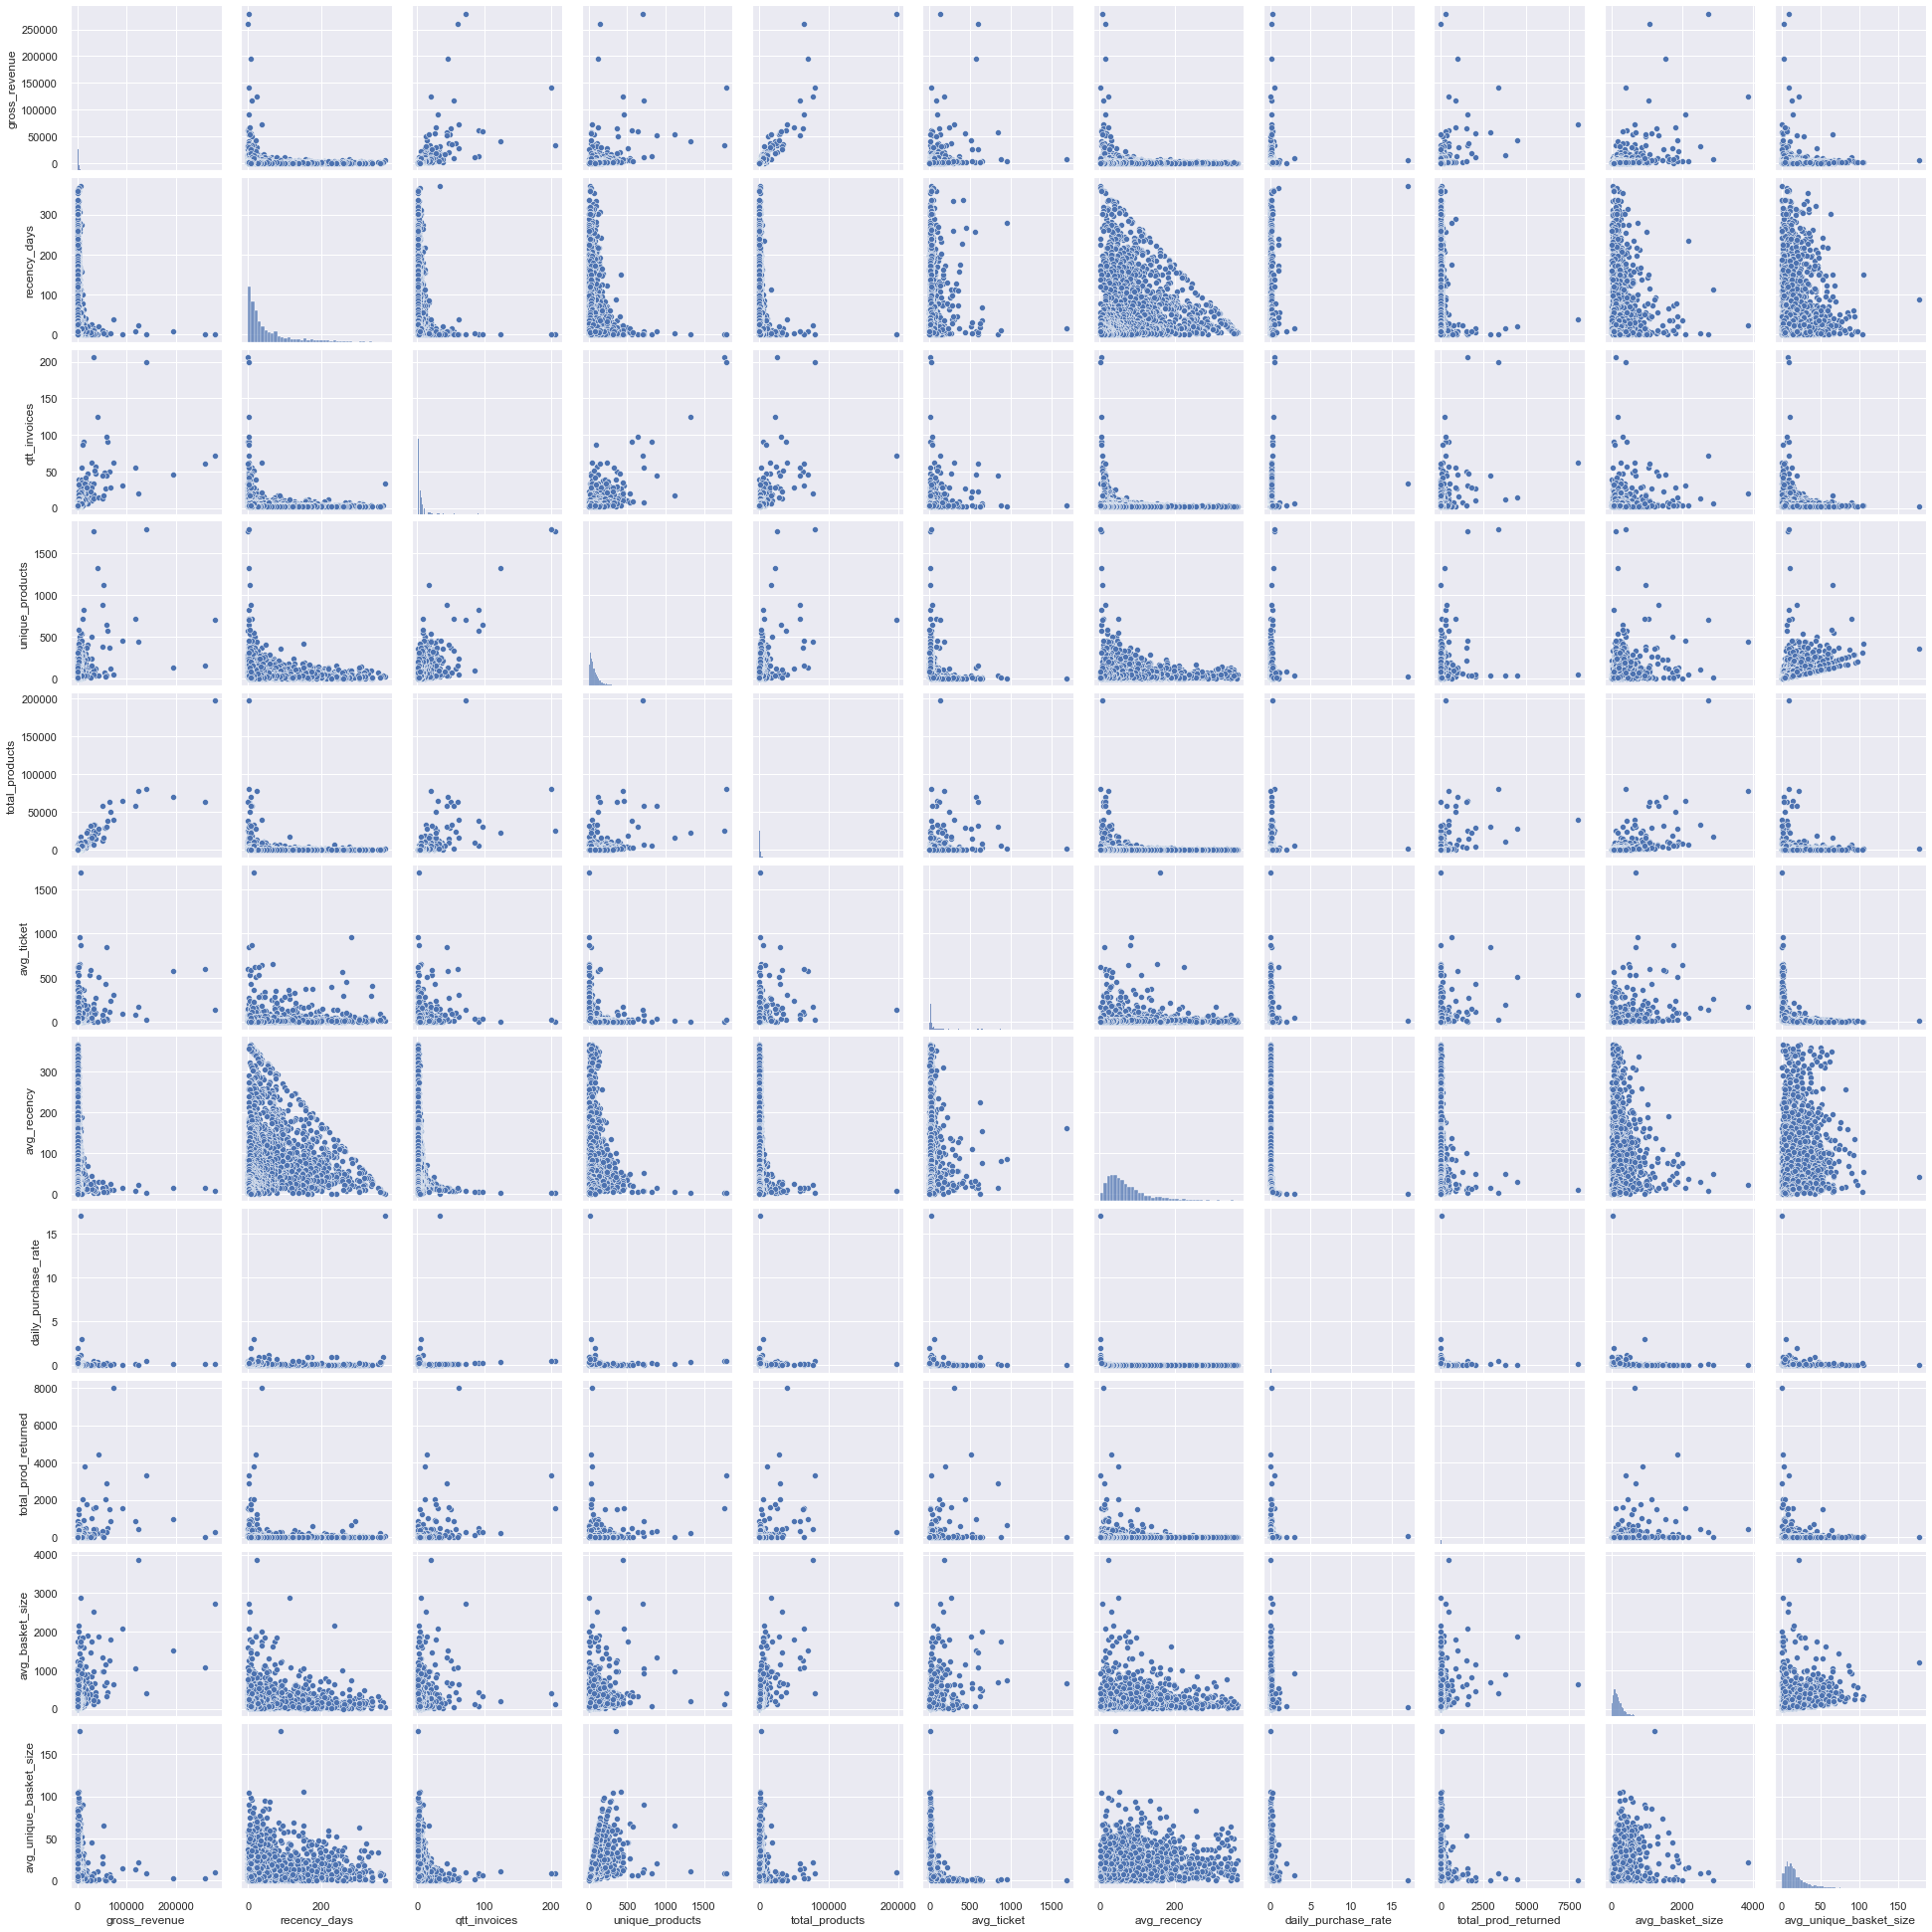

In [197]:
sns.pairplot(df4b)

In [198]:
#evaluations from 2D plot
biv_analysis = [['Feature', 'Variance'],
        ['gross_revenue', 'ok'],
        ['recency_days', 'ok'],
        ['qtt_invoices', 'ok'],
        ['unique_products', 'ok'],
        ['total_products', 'ok'],
        ['avg_ticket', 'ok'],
        ['avg_recency', 'ok'],
        ['daily_purchase_rate', 'low'],
        ['total_prod_returned', 'ok'],
        ['avg_basket_size', 'ok']
      ]
print(tabulate(biv_analysis, headers='firstrow', stralign='left', tablefmt='simple'))
#daily_purchase_rate has no variation, even when combined with other features. 
#So, removing it, probably the clustering will improve, because we will improve, because we  won't have this dimension anymore 

Feature              Variance
-------------------  ----------
gross_revenue        ok
recency_days         ok
qtt_invoices         ok
unique_products      ok
total_products       ok
avg_ticket           ok
avg_recency          ok
daily_purchase_rate  low
total_prod_returned  ok
avg_basket_size      ok


## Data Space Study

In [61]:
#original dataset
#df4s = df4.drop(columns=['customer_id'], axis=1).copy()

#selected features
cols_selected = ['customer_id','gross_revenue', 'recency_days', 'unique_products', 'daily_purchase_rate', 'total_prod_returned']
df4s = df4[cols_selected].copy()
df4s.head()

,customer_id,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,21.0,17.000000,40.0
1,13047,3232.59,56.0,105.0,0.028302,35.0
2,12583,6705.38,2.0,114.0,0.040323,50.0
3,13748,948.25,95.0,24.0,0.017921,0.0
4,15100,876.00,333.0,1.0,0.073171,22.0


In [64]:
mm = pp.MinMaxScaler()

df4s['gross_revenue'] = mm.fit_transform(df4s[['gross_revenue']])
df4s['recency_days'] = mm.fit_transform(df4s[['recency_days']])
#df4s['qtt_invoices'] = mm.fit_transform(df4s[['qtt_invoices']])
df4s['unique_products'] = mm.fit_transform(df4s[['unique_products']])
#df4s['total_products'] = mm.fit_transform(df4s[['total_products']])
#df4s['avg_ticket'] = mm.fit_transform(df4s[['avg_ticket']])
#df4s['avg_recency'] = mm.fit_transform(df4s[['avg_recency']])
df4s['daily_purchase_rate'] = mm.fit_transform(df4s[['daily_purchase_rate']])
df4s['total_prod_returned'] = mm.fit_transform(df4s[['total_prod_returned']])
#df4s['avg_basket_size'] = mm.fit_transform(df4s[['avg_basket_size']])
#df4s['avg_unique_basket_size'] = mm.fit_transform(df4s[['avg_unique_basket_size']])

X = df4s.copy()

In [65]:
X.head()

,customer_id,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,17850,0.019185,1.000000,0.011204,1.000000,0.004998
1,13047,0.011451,0.150538,0.058263,0.001345,0.004373
2,12583,0.023894,0.005376,0.063305,0.002052,0.006247
3,13748,0.003267,0.255376,0.012885,0.000734,0.000000
4,15100,0.003008,0.895161,0.000000,0.003985,0.002749


In [67]:
X.shape

(2772, 6)

### PCA

In [68]:
X.shape[1]

6

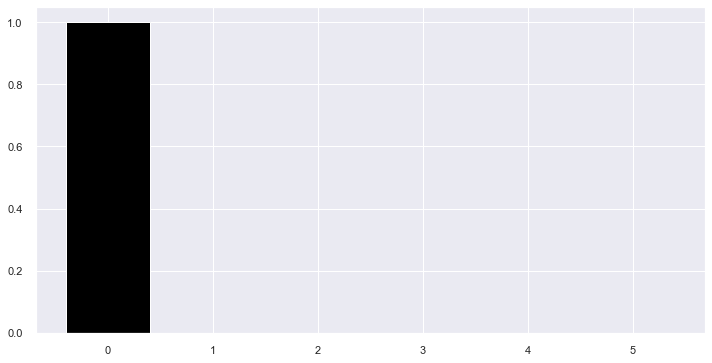

In [69]:
#define number of features on space
pca = dd.PCA (n_components=X.shape[1])

principal_components = pca.fit_transform( X )

#plot explianed variables (variance of the main components)
#x axis
features = range(pca.n_components_)
#y axis
plt.bar(features, pca.explained_variance_ratio_, color='black')

#pca_component
df_pca = pd.DataFrame(principal_components)

In [70]:
#main components
df_pca

,0,1,2,3,4,5
0,2564.886005,0.852707,0.064018,0.034744,-0.018739,0.985252
1,-2238.113997,0.002183,0.011642,-0.004428,0.000418,-0.000414
2,-2702.113997,-0.142202,0.009279,0.004966,-0.004283,0.001878
3,-1537.113997,0.109028,-0.024380,0.005604,-0.002529,-0.002002
4,-185.113996,0.744633,0.018138,0.006454,-0.001250,-0.007158
...,...,...,...,...,...,...
2767,-1689.113997,-0.136414,0.010068,-0.018350,0.002828,0.014240
2768,-392.113997,-0.125513,-0.018611,-0.001706,-0.001204,0.038270
2769,-1159.113997,-0.126583,-0.047776,0.013842,0.002304,0.043864
2770,-1764.113997,-0.155006,0.099888,-0.059662,0.010208,0.016493


<AxesSubplot:xlabel='0', ylabel='1'>

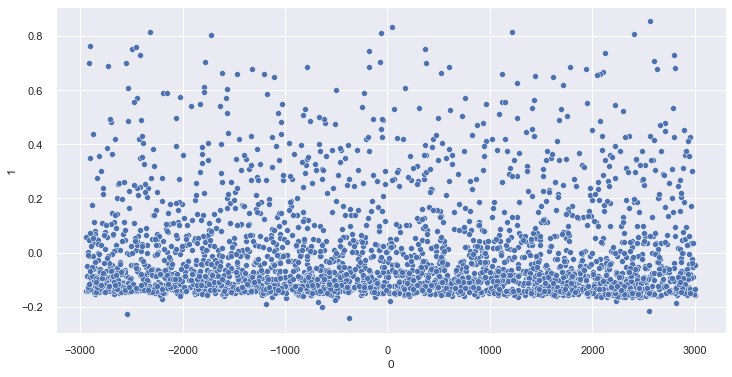

In [71]:
#plot scatterplot with 0 and 1 (2 with > variation)
sns.scatterplot(x=0, y=1, data=df_pca)
#there is no clear division, let's keep going.

### UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

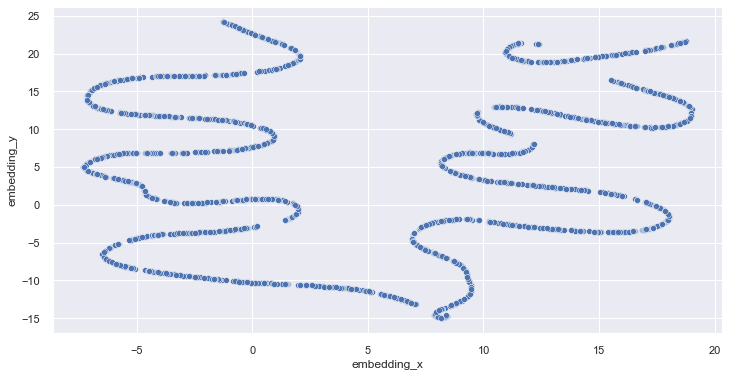

In [72]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( X )
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', data=df_pca )

### t-SNE

/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

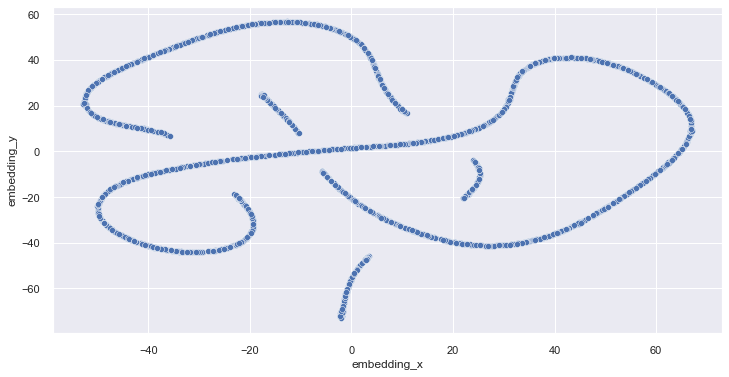

In [73]:
reducer = mn.TSNE( n_components=2, n_jobs=-1, random_state=42 )
embedding = reducer.fit_transform( X )
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', data=df_pca )

### Tree-Based Embedding

In [74]:
df4.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667,0.333333


In [75]:
#regression: 
#training dataset
X = df4.drop(columns=['customer_id','gross_revenue'], axis=1)
y = df4['gross_revenue']

#model definition
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)

#model trainig
rf_model.fit(X,y)

#leaf

#dataframe leaf

RandomForestRegressor(random_state=42)

In [76]:
#pass training to create leaves
df_leaf = pd.DataFrame ( rf_model.apply( X ) )

In [77]:
df_leaf.shape

(2772, 100)

In [78]:
X.shape

(2772, 10)

In [79]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2940,2898,2991,2945,2599,2910,2585,3054,2906,3080,2902,3033,2929,2516,2815,...,3163,2891,2900,2750,2960,2857,2825,2749,2919,2718,3104,2877,2785,2584,2701
1,2808,2804,2850,2781,2441,2916,2293,2686,2674,2669,2699,2522,2523,2761,2771,...,2756,2818,2886,2696,2545,2318,2742,2709,2297,2808,2411,2599,2770,2490,2640
2,3368,3322,3349,3425,3262,3402,3295,3339,3422,3355,3391,3279,3393,3422,3353,...,3382,3363,3405,3309,3373,3362,3252,3306,3328,3313,3433,3377,3213,3342,3323
3,1624,1814,1579,1692,1360,1695,1490,1569,1504,1043,1759,1512,1591,1690,1489,...,1024,1252,1061,1604,1600,2130,1247,1245,1301,1321,1711,1320,1841,1817,1675
4,487,537,523,544,541,566,379,415,480,552,525,713,567,530,441,...,583,474,581,555,473,559,544,762,246,361,120,688,558,154,446


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

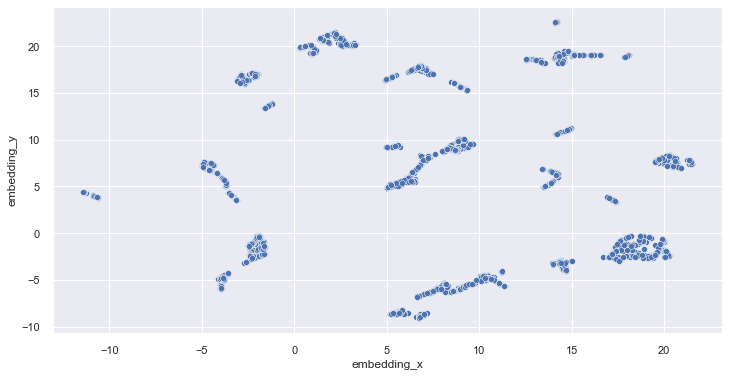

In [80]:
#reduce dimensionality from 10 to 2
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

#embedding (projection of 1000 dimensions on 2)
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', data=df_tree )

# Data Preparation

In [81]:
#df5 = df4.copy()
#df5.to_csv("../data/interim/cycle5/df5_EDA_done.csv")
df5 = df_tree.copy()
#df5.to_csv("../data/interim/cycle7/df_tree_EDA_done.csv")

In [82]:
df5

,embedding_x,embedding_y
0,-1.587280,13.378747
1,0.960933,19.273390
2,-2.620139,-3.105032
3,13.558169,5.024912
4,11.248529,-4.092452
...,...,...
2767,19.748058,7.877749
2768,8.849813,9.877320
2769,6.337861,5.548267
2770,8.682303,8.857617


In [267]:
#df5 =pd.read_csv("../data/interim/cycle5/df5_EDA_done.csv", index_col=0)
#df5

In [83]:
df5_asis = df4.copy()

In [50]:
#test each variable to define wich is the best standardization or reescaling
# mm = pp.MinMaxScaler()
# ss = pp.StandardScaler()
# rs = pp.RobustScaler()

# df5['gross_revenue'] = mm.fit_transform(df5[['gross_revenue']])
# df5['recency_days'] = mm.fit_transform(df5[['recency_days']])
# df5['qtt_invoices'] = mm.fit_transform(df5[['qtt_invoices']])
# df5['unique_products'] = mm.fit_transform(df5[['unique_products']])
# df5['total_products'] = mm.fit_transform(df5[['total_products']])
# df5['avg_ticket'] = mm.fit_transform(df5[['avg_ticket']])
# df5['avg_recency'] = mm.fit_transform(df5[['avg_recency']])
# df5['daily_purchase_rate'] = mm.fit_transform(df5[['daily_purchase_rate']])
# df5['total_prod_returned'] = mm.fit_transform(df5[['total_prod_returned']])
# df5['avg_basket_size'] = mm.fit_transform(df5[['avg_basket_size']])
# df5['avg_unique_basket_size'] = mm.fit_transform(df5[['avg_unique_basket_size']])

# variable = 'avg_unique_basket_size'

Min:0.2 - Max:177.0


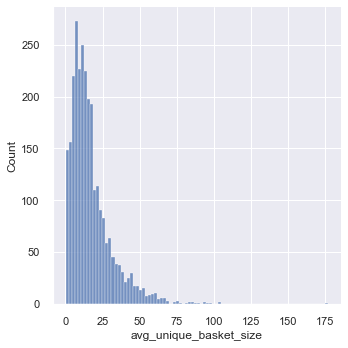

In [72]:
# #data AS IS
# print(f'Min:{df5_asis[variable].min()} - Max:{df5_asis[variable].max()}')
# sns.displot(df5_asis[variable]);

Min:0.0 - Max:1.0


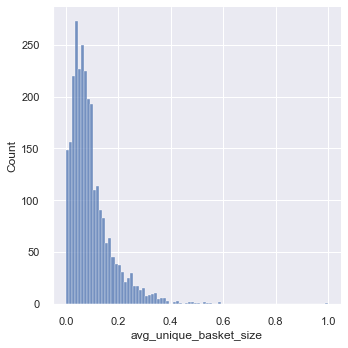

In [73]:
# #data standardized or reescaled
# print(f'Min:{df5[variable].min()} - Max:{df5[variable].max()}')
# sns.displot(df5[variable]);

/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_unique_basket_size'>

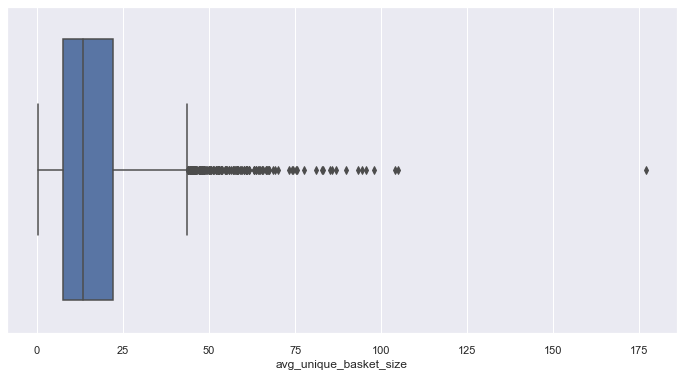

In [74]:
# #boxplot to check outliers
# sns.boxplot(df5_asis[variable])

In [75]:
# #after transformations:
# df5.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
0,17850,0.019185,1.000000,0.156863,0.011204,0.008794,0.009496,0.000000,1.000000,0.004998,0.012920,0.002362
1,13047,0.011451,0.150538,0.034314,0.058263,0.007051,0.009942,0.142009,0.001345,0.004373,0.039674,0.064857
2,12583,0.023894,0.005376,0.063725,0.063305,0.025533,0.015876,0.069863,0.002052,0.006247,0.086409,0.041855
3,13748,0.003267,0.255376,0.014706,0.012885,0.002220,0.018822,0.251142,0.000734,0.000000,0.022443,0.026018
4,15100,0.003008,0.895161,0.004902,0.000000,0.000396,0.172012,0.052055,0.003985,0.002749,0.006636,0.000754


# Feature Selection

In [23]:
# df6 = df5.copy()
# df6.to_csv("../data/interim/cycle7/df6_data_prep_done.csv")
# df6

,embedding_x,embedding_y
0,-4.142529,4.950604
1,-9.810326,-5.124522
2,-4.666814,11.155007
3,8.957256,-8.926686
4,8.031425,9.227686
...,...,...
5689,-0.516677,7.437184
5690,-6.707509,9.138551
5691,1.292613,-9.482571
5692,-5.556850,-7.160799


In [51]:
# cols_selected = ['customer_id','gross_revenue', 'recency_days', 'unique_products', 'daily_purchase_rate', 'total_prod_returned']

In [85]:
#df6 = df5[cols_selected].copy()
df6 = df_tree.copy()

# Hyperparameter Fine-Tuning

In [86]:
#X = df6.drop('customer_id', axis=1).copy()
X = df_tree.copy()
X.head()

,embedding_x,embedding_y
0,-1.587280,13.378747
1,0.960933,19.273390
2,-2.620139,-3.105032
3,13.558169,5.024912
4,11.248529,-4.092452


In [87]:
#clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
clusters = np.arange(2,25,1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

## K-Means

In [88]:
kmeans_list = []
for k in clusters:
    #model definition
    kmeans_model = c.KMeans( n_clusters=k )

    #model training
    kmeans_model.fit(X)

    #Model predict
    kmeans_labels = kmeans_model.predict(X)
    #labels: array([1, 5, 5, ..., 5, 3, 5], dtype=int32)
        
   #model perfomance (SS)
    kmeans_sil = m.silhouette_score(X, kmeans_labels, metric='euclidean')
    kmeans_list.append(kmeans_sil)

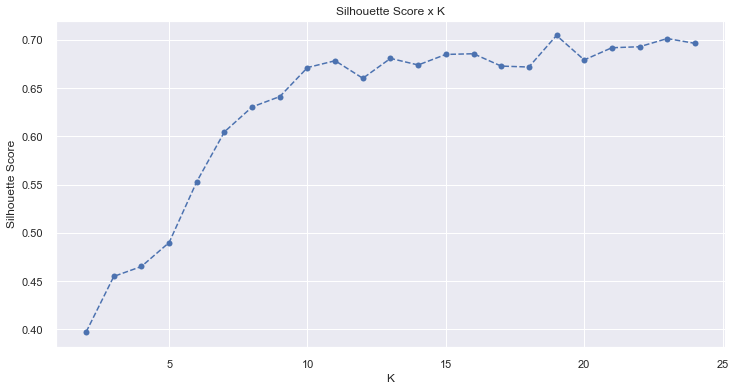

In [89]:
#Silhouette Score  (with feature selection done before creating embedding space)
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

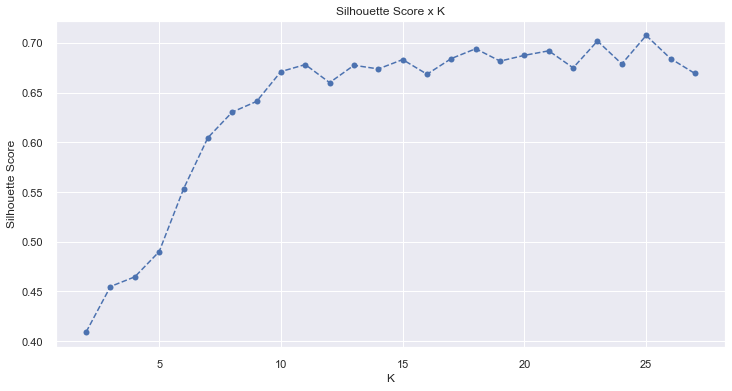

In [290]:
#Silhouette Score
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## Gaussian Mixture Model

In [90]:
gmm_list = []
for k in clusters:
    #model definition
    gmm_model = mx.GaussianMixture(n_components=k)

    #model training
    gmm_model.fit(X)

    #model predict
    gmm_labels = gmm_model.predict(X)

    #model perfomance (SS)
    gmm_sil = m.silhouette_score(X, gmm_labels, metric='euclidean')
    gmm_list.append(gmm_sil)

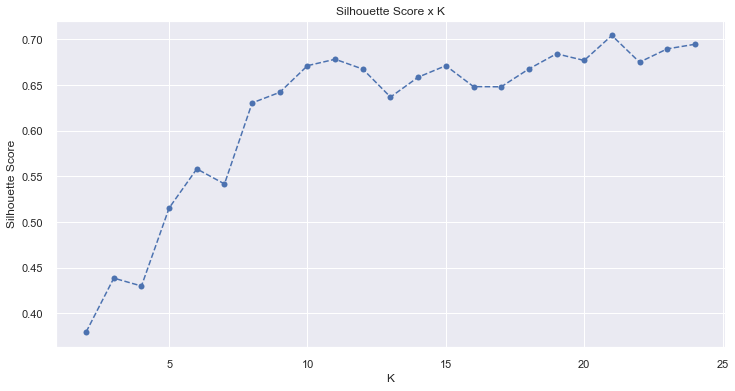

In [91]:
#Silhouette Score (with feature selection done before creating embedding space)
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

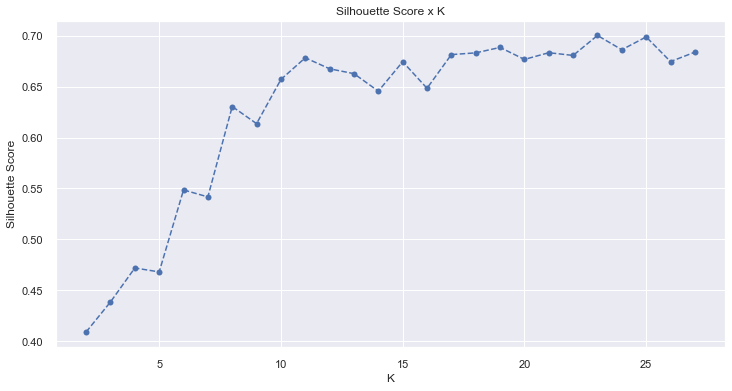

In [292]:
#Silhouette Score
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## Hierarchical Clustering

In [92]:
#using scipy instead of sklearn, so model definition and training are done toghether
k=2
hc_list = []
for k in clusters:
    #model definition and training
    hc_model = hc.linkage(X, 'ward')

    #model predict
    hc_labels = hc.fcluster(hc_model, k, criterion='maxclust')#to cut dendrogram

    #model perfomance (SS)
    hc_sil = m.silhouette_score(X, hc_labels, metric='euclidean')
    hc_list.append(hc_sil) 

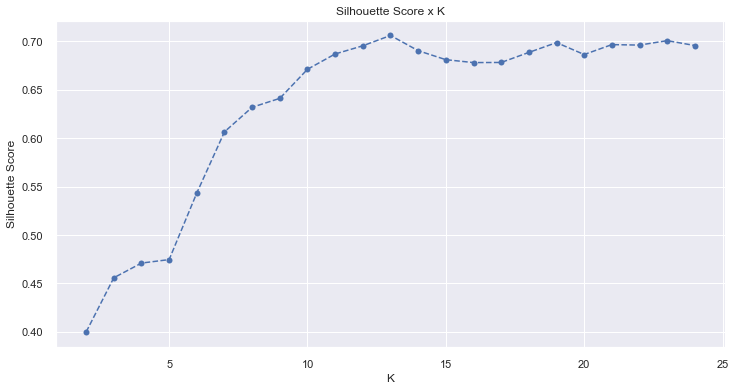

In [94]:
#Silhouette Score (with feature selection done before creating embedding space)
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

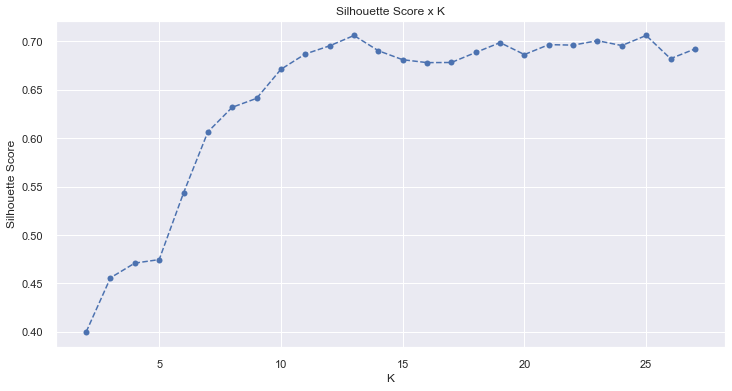

In [294]:
#Silhouette Score
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

[]

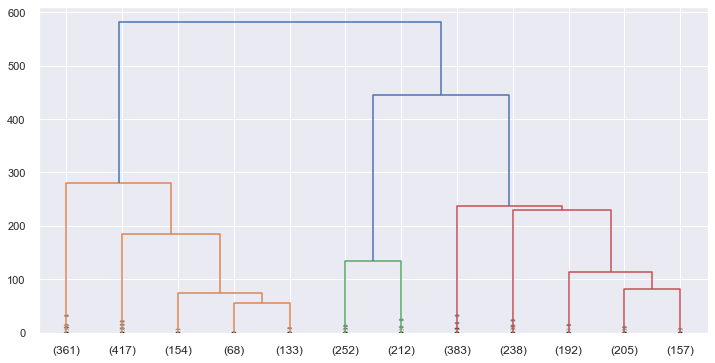

In [295]:
#truncated dendrogram
hc.dendrogram(
    hc_model,
    #leaf_rotation=90,
    #leaf_font_size=8,
    truncate_mode='lastp',#take out for complete (heavy)
    p=12, #truncate after 12 
    show_contracted=True
)
plt.plot()

## DBScan

In [33]:
# eps=2 #radius
# min_samples=10
# #model definition
# dbscan_model = c.DBSCAN( eps=eps, min_samples=min_samples)

# #model training & predict
# dbscan_labels = dbscan_model.fit_predict(X)

# #model perfomance (SS)
# dbscan_sil = m.silhouette_score(X, dbscan_labels, metric='euclidean')

# print(f'SS: {dbscan_sil}')
# print(f'Number of clusters: {len(np.unique(dbscan_labels))}')
# print(f'Clusters: {np.unique(dbscan_labels)}')

SS: 0.5305798649787903
Number of clusters: 23
Clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


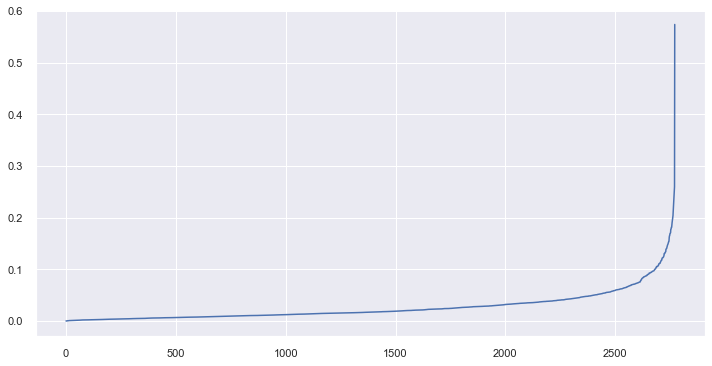

In [354]:
# #find best number of eps and min_samples:
# neighbors = NearestNeighbors( n_neighbors=min_samples).fit(X)
# nn_distances, nn_indexes = neighbors.kneighbors(X)
# #sort asc
# nn_distances = np.sort(nn_distances, axis=0)
# #get just first columns, cause being a matrix, I have the distance to all point 
# nn_distances = nn_distances[:,1]
# #plot
# plt.plot(nn_distances);

In [95]:
X.shape

(2772, 2)

In [357]:
# #found 22 clusters with SS=0.65355945, let's set zero on others to be able to compare
# dbscan_list = [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.693327, 0.000000, 0.000000, 0.000000 ,0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]

## Results

In [330]:
#cycle 5
# df_results = pd.DataFrame({'K-Means':kmeans_list, 'GMM':gmm_list, 'HC':hc_list, 'DBScan':dbscan_list }).T
# df_results.columns = clusters
# #highlight best cluster per algorithm according to SS 
# df_results.style.highlight_max(color='green', axis=1)

In [220]:
#cycle 6 with original space
# df_results = pd.DataFrame({'K-Means':kmeans_list, 'GMM':gmm_list, 'HC':hc_list, 'DBScan':dbscan_list }).T
# df_results.columns = clusters
# #highlight best cluster per algorithm according to SS 
# df_results.style.highlight_max(color='green', axis=1)

,2,3,4,5,6,7
K-Means,0.688987,0.526637,0.494946,0.514085,0.453683,0.446855
GMM,0.103442,0.065081,-0.031269,0.129023,-0.037215,0.052627
HC,0.697905,0.492199,0.478115,0.492314,0.427502,0.413285
DBScan,0.838929,0.000000,0.000000,0.000000,0.000000,0.000000


In [96]:
#cycle 6 with tree-based space (with feature selection done before creating embedding space)
df_results = pd.DataFrame({'K-Means':kmeans_list, 'GMM':gmm_list, 'HC':hc_list#,'DBScan':dbscan_list 
                          }).T
df_results.columns = clusters
#highlight best cluster per algorithm according to SS 
df_results.style.highlight_max(color='green', axis=1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
K-Means,0.397434,0.454956,0.465258,0.490052,0.553140,0.604667,0.630419,0.641151,0.671176,0.678216,0.660062,0.680638,0.673845,0.684752,0.685465,0.672684,0.671715,0.704387,0.679072,0.691679,0.692721,0.701164,0.696250
GMM,0.379742,0.438670,0.430031,0.515458,0.558203,0.541743,0.630419,0.642043,0.671176,0.678216,0.667416,0.636825,0.658586,0.671165,0.648261,0.648048,0.667563,0.684201,0.676889,0.704227,0.674976,0.689556,0.694573
HC,0.399931,0.455900,0.471065,0.474664,0.543491,0.606577,0.631956,0.641151,0.671176,0.686985,0.695414,0.706080,0.690377,0.681077,0.678081,0.678203,0.688573,0.698725,0.686403,0.696631,0.696146,0.700712,0.695699


In [ ]:
#24 clusters is too much for business team, with 11, we have almost 7.0 with k-Means, wich is very good!

# Silhouette Analysis

For a good clustering, we need clusters to have two properties:

- Compactness: smallest possible distance between the points of the same cluster.
- Separation: greatest possible distance between the points of different clusters.

Let's use Silhouette Score (SS) for all algorithms, wich calculates both Compactness and Separation

### Generic Silhouette Analysis

 For K = 2. Silhouette Score: 0.3999306261539459
 For K = 3. Silhouette Score: 0.4559001922607422
 For K = 4. Silhouette Score: 0.4710649251937866
 For K = 5. Silhouette Score: 0.4746635854244232
 For K = 6. Silhouette Score: 0.5434907674789429
 For K = 7. Silhouette Score: 0.6065773367881775


IndexError: index 3 is out of bounds for axis 0 with size 3

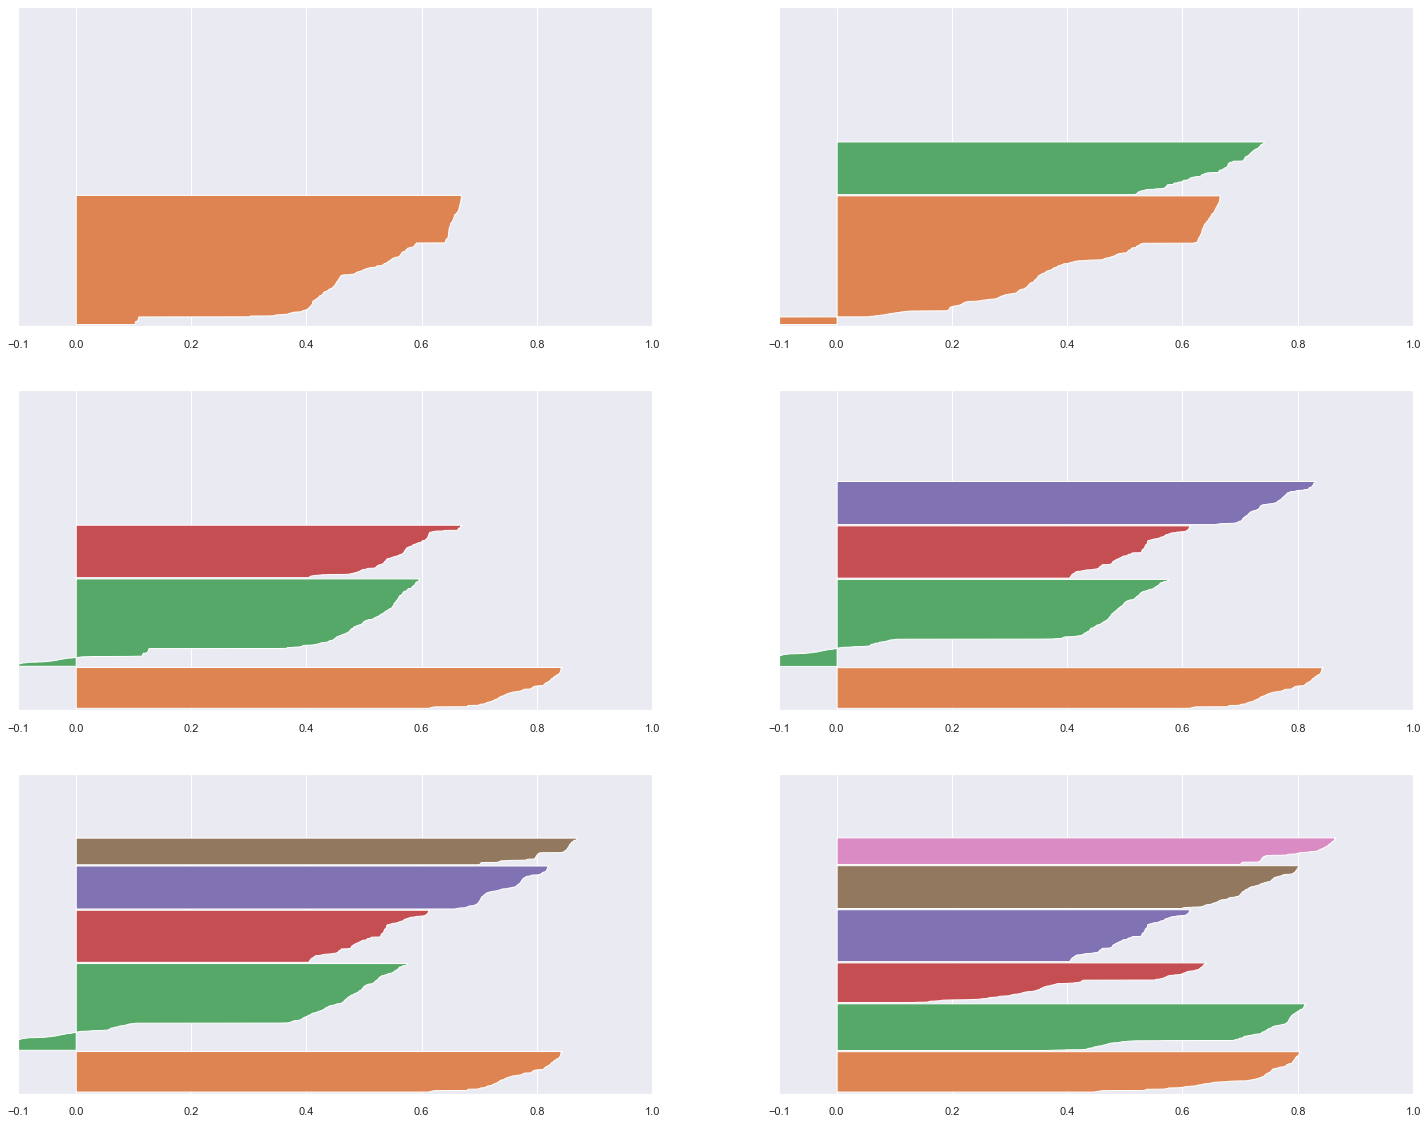

In [97]:
#Using with HC here:
fig, ax = plt.subplots( 3, 2 )
fig.set_size_inches( 25, 20 )

for k in clusters:
    #position to plot
    q, mod = divmod( k, 2 )
    ax[q-1, mod].set_xlim( [ -0.1, 1] )
    ax[q-1, mod].set_ylim( [ 0, len( X ) + ( k+1 )*10] )
    
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( X, labels, metric='euclidean' )
    print( ' For K = {}. Silhouette Score: {}'.format( k, ss ) )

    #get silhouette values of each sample
    samples_silhouette_values = m.silhouette_samples( X, labels )

    #space between clusters
    y_lower = 10
    for i in range( k ):

        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # define colors range
        cmap = cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values  )
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks( [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Model Training

## K-Means

In [100]:
k = 10
#model definition
kmeans = c.KMeans( init='random', #init centroids ramdomly
                  n_clusters=k, #3
                  n_init=20, #Num of times k-means will be run with different centroid seeds.
                  max_iter=300, #up to 300 times
                 random_state=42) #seed, to generate the same random init
#model training
kmeans.fit(X)
#get cluster of each row
kmeans_labels = kmeans.labels_

In [101]:
kmeans_labels

array([4, 4, 8, ..., 2, 2, 9], dtype=int32)

### GMM

In [102]:
k = 10
#model definition
gmm = mx.GaussianMixture(n_components=k)
#model training
gmm.fit(X)
#model predict
gmm_labels = gmm.predict(X)

In [103]:
gmm_labels

array([5, 5, 4, ..., 2, 2, 9])

## Cluster Validation

#### K-Means

In [104]:
#Metric: WSS (Within-cluster sum of square)
#this method of k-means (sklearn) returns the WSS
print(f'K-Means - WSS Value: {kmeans.inertia_}')

#Metric: SS (Silhouette Score)
#this method of k-means (sklearn) returns the SS
print(f'K-Means - SS Value: {m.silhouette_score(X, kmeans_labels, metric="euclidean")}')

K-Means - WSS Value: 16391.611328125
K-Means - SS Value: 0.6481915712356567


#### GMM

In [105]:
#Metric: SS (Silhouette Score)
#this method of k-means (sklearn) returns the SS
print(f'GMM - SS Value: {m.silhouette_score(X, gmm_labels, metric="euclidean")}')

GMM - SS Value: 0.5904864072799683


# Cluster Analysis

In [110]:
df9 = X.copy()
df9['cluster']= kmeans_labels #define model
df9

,embedding_x,embedding_y,cluster
0,-1.587280,13.378747,4
1,0.960933,19.273390,4
2,-2.620139,-3.105032,8
3,13.558169,5.024912,6
4,11.248529,-4.092452,5
...,...,...,...
2767,19.748058,7.877749,3
2768,8.849813,9.877320,2
2769,6.337861,5.548267,2
2770,8.682303,8.857617,2


In [225]:
# cols_selected = ['customer_id','gross_revenue', 'recency_days', 'unique_products', 'daily_purchase_rate', 'total_prod_returned'] #get same columns
# df9 = df9[cols_selected].copy()
# df9.head()

,customer_id,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,21.0,17.000000,40.0
1,13047,3232.59,56.0,105.0,0.028302,35.0
2,12583,6705.38,2.0,114.0,0.040323,50.0
3,13748,948.25,95.0,24.0,0.017921,0.0
4,15100,876.00,333.0,1.0,0.073171,22.0


In [226]:
# df9['cluster'] = labels
# df9.head()

,customer_id,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned,cluster
0,17850,5391.21,372.0,21.0,17.000000,40.0,1
1,13047,3232.59,56.0,105.0,0.028302,35.0,2
2,12583,6705.38,2.0,114.0,0.040323,50.0,0
3,13748,948.25,95.0,24.0,0.017921,0.0,2
4,15100,876.00,333.0,1.0,0.073171,22.0,1


## Visualization Inspection

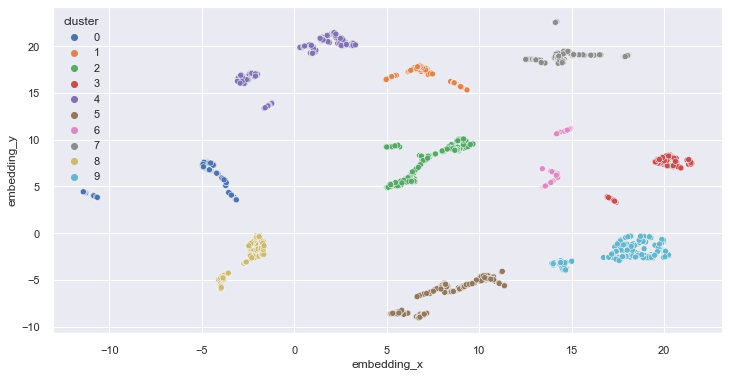

In [107]:
#K-MEANS with 10 clusters
sns.scatterplot(x='embedding_x', y='embedding_y', hue='cluster', data=df9, palette='deep');

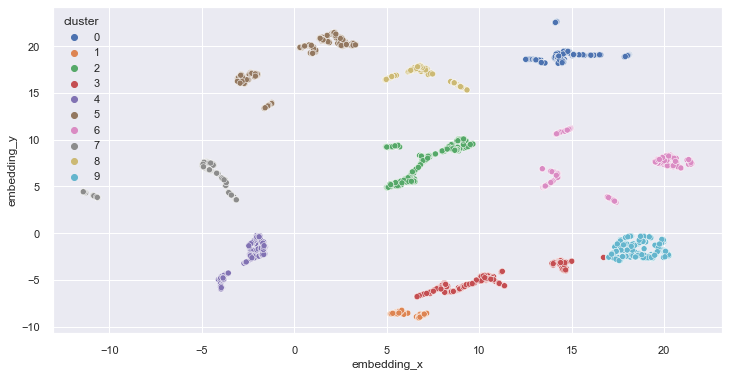

In [109]:
#GMM with 10 clusters
sns.scatterplot(x='embedding_x', y='embedding_y', hue='cluster', data=df9, palette='deep');

/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


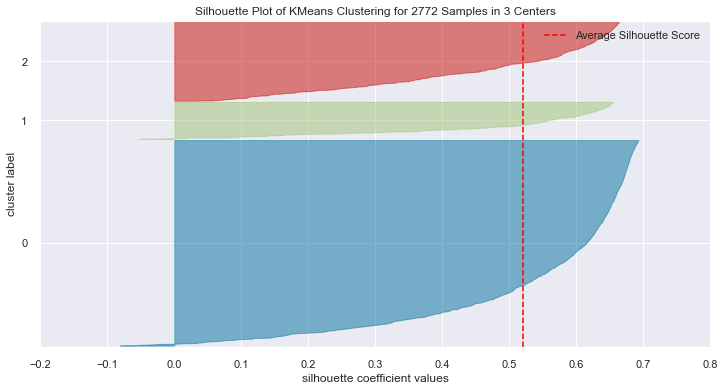

In [227]:
#using (X), reescaled!
#there is no way to plot more than 3D charts, so let's use the Silhouette Plot
# visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
# visualizer.fit( X )
# visualizer.finalize()

## 2d Plot

In [111]:
#chech wich features are messing up with the clustering, but it's not good do take a decision just looking at the plot, because two "bad" features combined, can turn into a "good" feature
df9.head()

,embedding_x,embedding_y,cluster
0,-1.587280,13.378747,4
1,0.960933,19.273390,4
2,-2.620139,-3.105032,8
3,13.558169,5.024912,6
4,11.248529,-4.092452,5


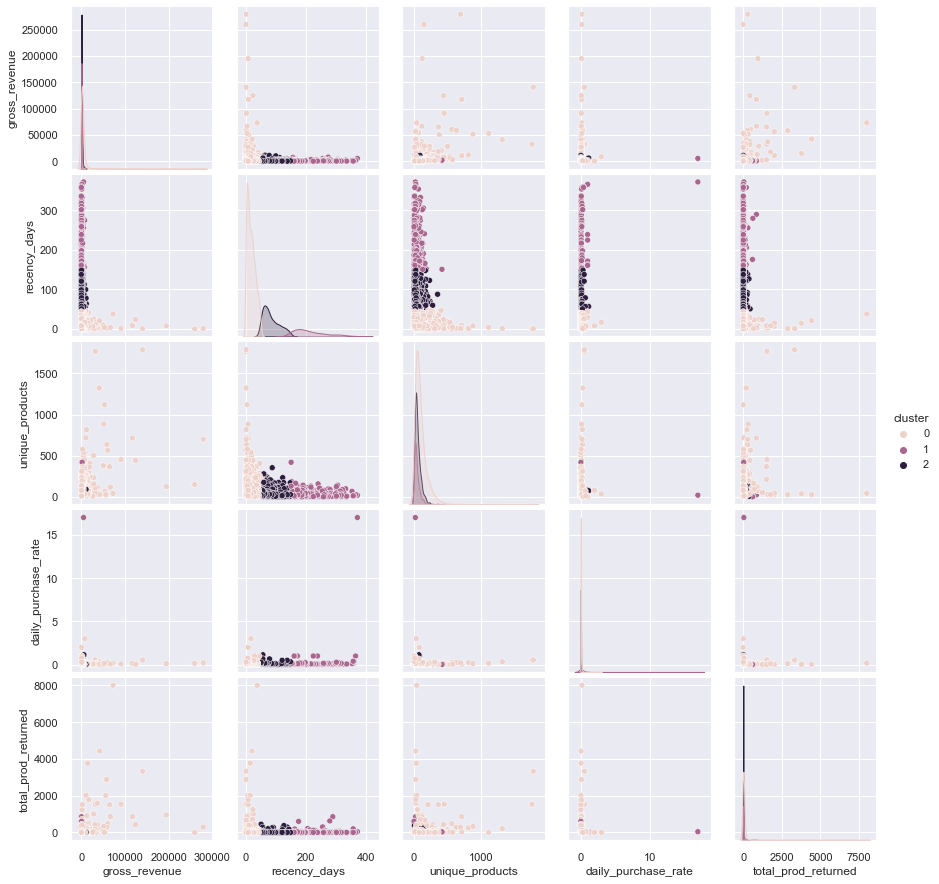

In [229]:
# #plot pairplot to try to see patterns
# df_viz = df9.drop(columns='customer_id', axis=1)
# sns.pairplot(df_viz, hue='cluster')

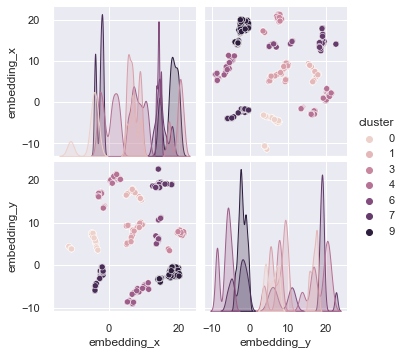

In [112]:
#plot pairplot to try to see patterns
df_viz = df9.copy()
sns.pairplot(df_viz, hue='cluster')

## UMAP

In [230]:
#X.head()

,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,0.019185,1.000000,0.011204,1.000000,0.004998
1,0.011451,0.150538,0.058263,0.001345,0.004373
2,0.023894,0.005376,0.063305,0.002052,0.006247
3,0.003267,0.255376,0.012885,0.000734,0.000000
4,0.003008,0.895161,0.000000,0.003985,0.002749


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

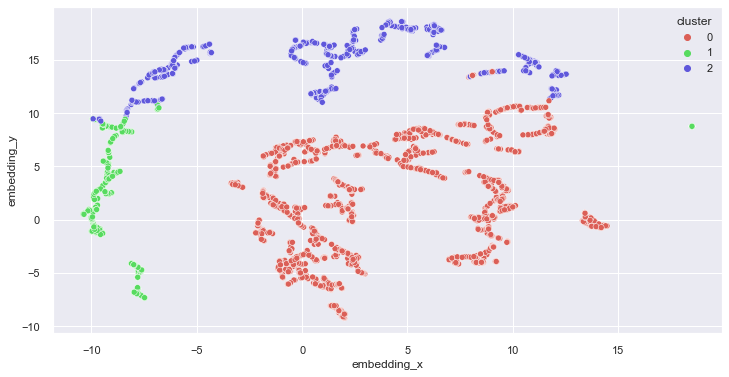

In [231]:
# #n_neighbors=5

# #reducer: high dimensionality projection
# reducer = umap.UMAP( n_neighbors=5, #bigger: global structures, smaller: local structures (like a zoom!)
#                     random_state=42 )
# #fit variables in high dimensionality (x), projecting them in low dimensionality, generating the enbedding space
# embedding = reducer.fit_transform( X )

# # embedding
# df_viz['embedding_x'] = embedding[:, 0] #component 1
# df_viz['embedding_y'] = embedding[:, 1] #component 2

# # plot UMAP
# sns.scatterplot( x='embedding_x', y='embedding_y', 
#                  hue='cluster', #cluster color
#                  palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),# formula to get the number of clusters automatically)
#                  data=df_viz )

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

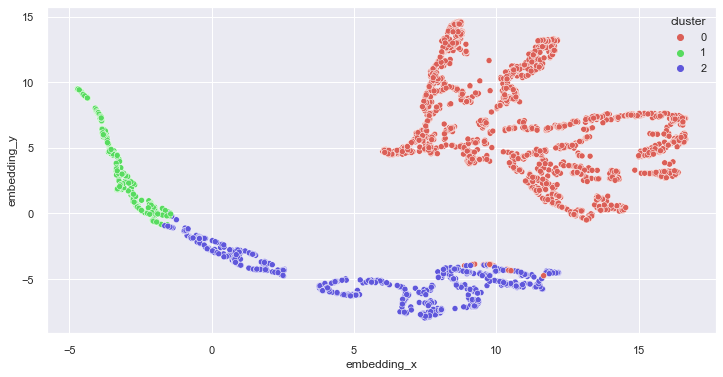

In [232]:
# #n_neighbors=15
# reducer = umap.UMAP( n_neighbors=15, random_state=42 )
# embedding = reducer.fit_transform( X )
# df_viz['embedding_x'] = embedding[:, 0]
# df_viz['embedding_y'] = embedding[:, 1]
# sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

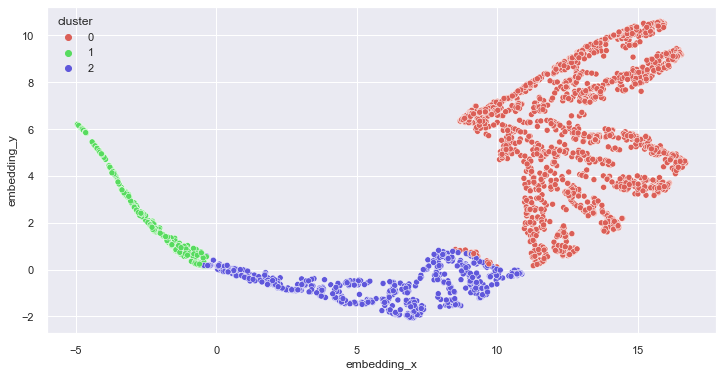

In [233]:
# #n_neighbors=80
# reducer = umap.UMAP( n_neighbors=80, random_state=42 )
# embedding = reducer.fit_transform( X )
# df_viz['embedding_x'] = embedding[:, 0]
# df_viz['embedding_y'] = embedding[:, 1]
# sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )

In [234]:
#next cycles
pass

## Cluster Profile

In [129]:
df9p = df5_asis[cols_selected].copy() #df5_asis contains original values (not reescaled), to use it in cluster profile
df9p['cluster'] = kmeans_labels
df9p.head()

,customer_id,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned,cluster
0,17850,5391.21,372.0,21.0,17.000000,40.0,4
1,13047,3232.59,56.0,105.0,0.028302,35.0,4
2,12583,6705.38,2.0,114.0,0.040323,50.0,8
3,13748,948.25,95.0,24.0,0.017921,0.0,6
4,15100,876.00,333.0,1.0,0.073171,22.0,5


In [131]:
#building df_cluster

# Number of customer
df_cluster = df9p[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = df_cluster['customer_id'] / df_cluster['customer_id'].sum()*100

# Agg gross revenue
df_avg_gross_revenue = df9p[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Avg recency days
df_avg_recency_days = df9p[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Avg unique products
df_avg_unique_products = df9p[['unique_products','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_unique_products, how='inner', on='cluster')

# Avg daily purchase rate
df_avg_daily_purchase_rate = df9p[['daily_purchase_rate','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_daily_purchase_rate, how='inner', on='cluster')

# Avg total products returned
df_avg_total_prod_returned = df9p[['total_prod_returned','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_total_prod_returned, how='inner', on='cluster')
# cluster profiles
df_cluster.sort_values('gross_revenue', ascending=False)

,cluster,customer_id,perc_customer,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,0,212,7.647908,14472.211604,24.136792,184.683962,0.054661,200.943396
8,8,252,9.090909,7786.557976,20.746032,176.198413,0.065514,80.996032
4,4,362,13.059163,2592.632818,39.723757,112.511050,0.077966,22.759669
1,1,192,6.926407,1898.527760,40.406250,84.036458,0.034182,21.916667
7,7,238,8.585859,1660.996303,32.764706,87.105042,0.031101,17.235294
6,6,153,5.519481,1177.341307,60.300654,67.862745,0.027139,4.875817
2,2,383,13.816739,1065.378251,63.180157,62.026110,0.042418,10.574413
3,3,202,7.287157,762.728267,78.173267,49.292079,0.045044,6.316832
9,9,417,15.043290,588.428561,78.441247,43.134293,0.044252,3.597122
5,5,361,13.023088,355.861607,95.961219,21.731302,0.054259,2.315789


In [133]:
pwd

'/Users/home/repos/pa005_fidelity_program/notebooks'

In [136]:
df_cluster.to_csv('../data/interim/cycle7/df_cluster_kmeans_10ks.csv')

In [132]:
#generate the repport dinamically:
for i in range(len(df_cluster['customer_id'])):
    
    print(f""" Cluster {df_cluster['cluster'][i]}:
    -Number of customers: {df_cluster['customer_id'][i]} ({round(df_cluster['perc_customer'][i])}%)
    -Average revenue: ${round(df_cluster['gross_revenue'][i])}
    -Average recency: by each {round(df_cluster['recency_days'][i])} days ({round(df_cluster['recency_days'][i]/7)} week(s))
    -Average unique products purchased: {round(df_cluster['unique_products'][i])}  
    -Average purchases/month: {round((df_cluster['daily_purchase_rate'][i])*30 ,1)} 
    -Average total products returned: {round(df_cluster['total_prod_returned'][i])} 
          \n """)

 Cluster 0:
    -Number of customers: 212 (8%)
    -Average revenue: $14472
    -Average recency: by each 24 days (3 week(s))
    -Average unique products purchased: 185  
    -Average purchases/month: 1.6 
    -Average total products returned: 201 
          
 
 Cluster 1:
    -Number of customers: 192 (7%)
    -Average revenue: $1899
    -Average recency: by each 40 days (6 week(s))
    -Average unique products purchased: 84  
    -Average purchases/month: 1.0 
    -Average total products returned: 22 
          
 
 Cluster 2:
    -Number of customers: 383 (14%)
    -Average revenue: $1065
    -Average recency: by each 63 days (9 week(s))
    -Average unique products purchased: 62  
    -Average purchases/month: 1.3 
    -Average total products returned: 11 
          
 
 Cluster 3:
    -Number of customers: 202 (7%)
    -Average revenue: $763
    -Average recency: by each 78 days (11 week(s))
    -Average unique products purchased: 49  
    -Average purchases/month: 1.4 
    -Averag

# EDA - Insights

### Hypothesis Mindmap

### Business Hipothesis

### Hipothesis Priorization

### Hipothesis Validation

### Answers Table

# Deploy

In [145]:
#in the future